In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'pd_speech_features.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Separate features and target
X = data.drop(columns=['id', 'class'])
y = data['class']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train a model (Logistic Regression as a baseline)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


FileNotFoundError: [Errno 2] No such file or directory: 'pd_speech_features.csv'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Libraries
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as Naive_Bayes

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score




## Preprocessing

In [3]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('/content/drive/MyDrive/Parkinson Disease prediction/pd_speech_features.csv')

In [4]:
# Exploring Dataset Content
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.tail()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
750,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
751,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
752,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
753,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
754,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [6]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 755
Number of Instances In Dataset :  755


In [7]:
# Dropping The Name Column
df.drop(['id'], axis=1, inplace=True)

In [8]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 754
Number of Instances In Dataset :  755


In [9]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


In [10]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02,...,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.516556,0.746225,0.700567,0.488854,323.976159,322.682119,0.006360,0.000383,0.002325,1.673965e-05,...,26.267260,22.865258,18.608580,13.885309,12.229445,12.386897,14.814613,14.766103,31.509470,0.745695
std,0.500057,0.169398,0.069637,0.137420,99.284774,99.468346,0.001828,0.000728,0.002630,2.291598e-05,...,42.240613,32.640892,25.548051,20.055984,17.793089,16.349404,15.727231,14.437002,34.244795,0.435758
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762765,0.647335,0.386325,251.000000,250.000000,0.005001,0.000049,0.000970,5.260000e-06,...,2.404450,3.451300,3.357100,3.076700,2.936950,3.114350,3.671450,3.737650,3.943200,0.000000
50%,1.000000,0.809730,0.700690,0.484100,317.000000,316.000000,0.006057,0.000076,0.001490,9.510000e-06,...,5.593700,7.086800,6.080500,4.797100,4.303600,4.745600,6.736100,7.353900,10.687200,1.000000
75%,1.000000,0.834400,0.754990,0.585545,384.500000,383.500000,0.007528,0.000172,0.002520,1.835000e-05,...,29.045650,29.865000,22.015100,13.193000,10.914100,12.218250,21.959000,22.527250,61.144550,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [11]:
# df['class'] accesses the class column of the DataFrame df.
df['class'] = df['class'].astype('uint8')

In [12]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [13]:
# Checking For Missing Values In Dataset
# This gives the count of NaN values in each column.
df.isna().sum()

,0
gender,0
PPE,0
DFA,0
RPDE,0
numPulses,0
...,...
tqwt_kurtosisValue_dec_33,0
tqwt_kurtosisValue_dec_34,0
tqwt_kurtosisValue_dec_35,0
tqwt_kurtosisValue_dec_36,0


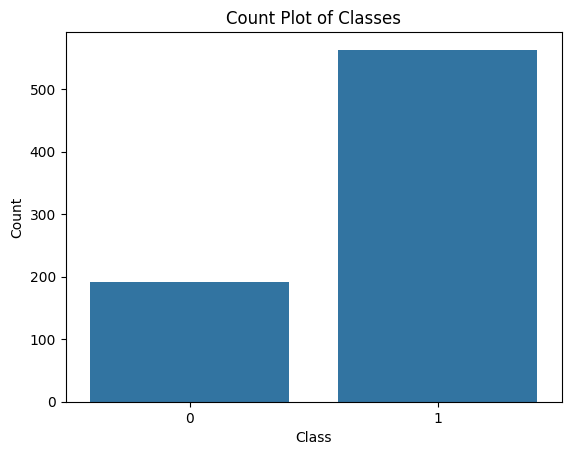

In [14]:
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot of Classes')
#plt.savefig('countplot_high_quality.jpg', dpi=300)
plt.show()

# 0 means NO Disease
# 1 means Yes   Disease

In [15]:
cor_matrix = df.corr()
cor_matrix


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
gender,1.000000,0.010542,0.097331,0.170109,-0.478747,-0.478085,0.460492,-0.111124,0.111952,0.147453,...,-0.099512,-0.000579,0.065316,0.082886,0.089258,0.106983,0.128062,0.106810,0.104072,0.183682
PPE,0.010542,1.000000,-0.094374,-0.406300,0.191555,0.194116,-0.201854,-0.423595,-0.349038,-0.330966,...,0.144482,0.135781,0.091966,0.065223,0.044326,0.045952,0.046451,0.037665,0.039817,-0.073162
DFA,0.097331,-0.094374,1.000000,0.157953,-0.287383,-0.287197,0.253750,0.084090,0.212296,0.201205,...,-0.147805,-0.105943,-0.062607,-0.064683,-0.062949,-0.035161,0.041919,0.066315,0.115563,0.307987
RPDE,0.170109,-0.406300,0.157953,1.000000,-0.521580,-0.525233,0.507428,0.334333,0.614996,0.609765,...,-0.315118,-0.277942,-0.148243,-0.100826,-0.098358,-0.096468,-0.035354,-0.016946,0.022896,0.246840
numPulses,-0.478747,0.191555,-0.287383,-0.521580,1.000000,0.999917,-0.897109,-0.187505,-0.426357,-0.516941,...,0.268927,0.177272,0.043949,-0.024247,-0.036181,-0.047976,-0.068719,-0.069702,-0.062967,-0.284097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,0.106983,0.045952,-0.035161,-0.096468,-0.047976,-0.047866,0.039357,-0.092687,0.018439,0.028900,...,0.238914,0.486360,0.708522,0.841309,0.945095,1.000000,0.824551,0.698599,0.543646,0.120271
tqwt_kurtosisValue_dec_34,0.128062,0.046451,0.041919,-0.035354,-0.068719,-0.068613,0.045967,-0.062070,0.027801,0.026381,...,0.139219,0.382986,0.587207,0.667187,0.729424,0.824551,1.000000,0.947970,0.785016,0.193030
tqwt_kurtosisValue_dec_35,0.106810,0.037665,0.066315,-0.016946,-0.069702,-0.069521,0.040648,-0.067999,0.010459,0.007788,...,0.054000,0.274974,0.476831,0.550484,0.609527,0.698599,0.947970,1.000000,0.866623,0.220176
tqwt_kurtosisValue_dec_36,0.104072,0.039817,0.115563,0.022896,-0.062967,-0.062829,0.031533,-0.067442,0.003725,0.001584,...,-0.108775,0.069601,0.289745,0.385810,0.467757,0.543646,0.785016,0.866623,1.000000,0.280446


In [16]:
# Selecting features and target variable
X = df.iloc[:, :753]
y = df['class']

In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

## Now Apply Machine Learning Models

## Logistic Regression

In [18]:
# Logistic Regression
import warnings
# Ignoring all warnings
warnings.filterwarnings("ignore")
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
logistic_predictions = logistic_model.predict(X_test)

# Calculate precision score and print classification report
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
print(classification_report(y_test, logistic_predictions, zero_division=1))
#The average='macro' parameter calculates precision for each class and returns their unweighted mean.
# The zero_division=1 parameter handles cases where there are no true positives or true negatives, avoiding division by zero errors.



              precision    recall  f1-score   support

           0       0.59      0.22      0.32        45
           1       0.74      0.93      0.83       106

    accuracy                           0.72       151
   macro avg       0.66      0.58      0.57       151
weighted avg       0.69      0.72      0.68       151



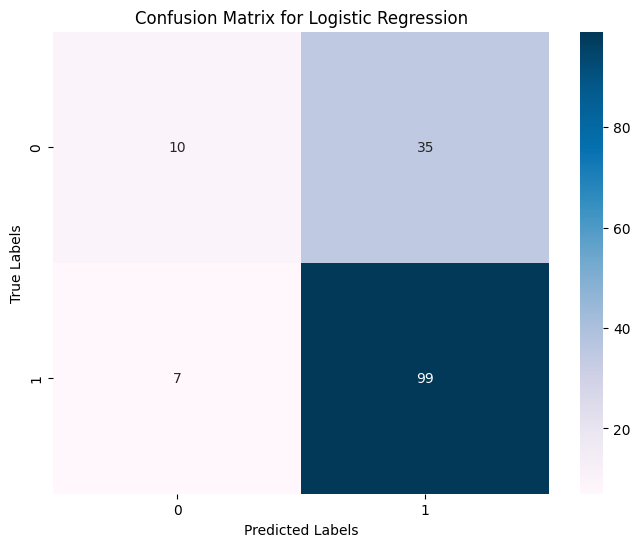

In [19]:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
#plt.savefig('CM_LR.jpg', dpi=300)
plt.show()


In [20]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

print("ROC AUC Score: ", logistic_roc_auc)

ROC AUC Score:  0.5780922431865828


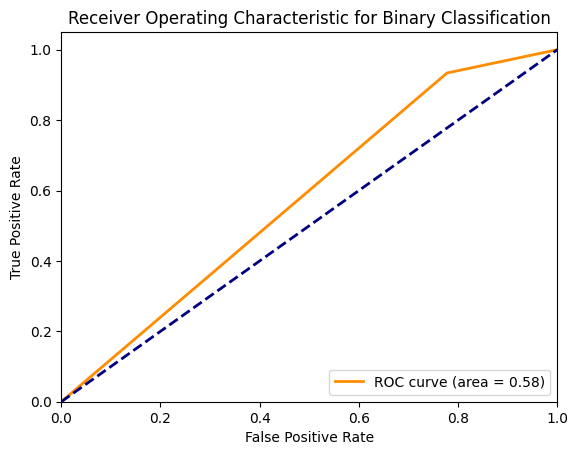

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_LR.jpg', dpi=300)
plt.show()


## Support Vector Machine (SVM)

In [22]:
# SVM
# Modelling Libraries
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate precision score and print classification report
svm_precision = precision_score(y_test, svm_predictions, average='macro')

print(classification_report(y_test, svm_predictions, zero_division=1))


              precision    recall  f1-score   support

           0       0.64      0.20      0.31        45
           1       0.74      0.95      0.83       106

    accuracy                           0.73       151
   macro avg       0.69      0.58      0.57       151
weighted avg       0.71      0.73      0.67       151



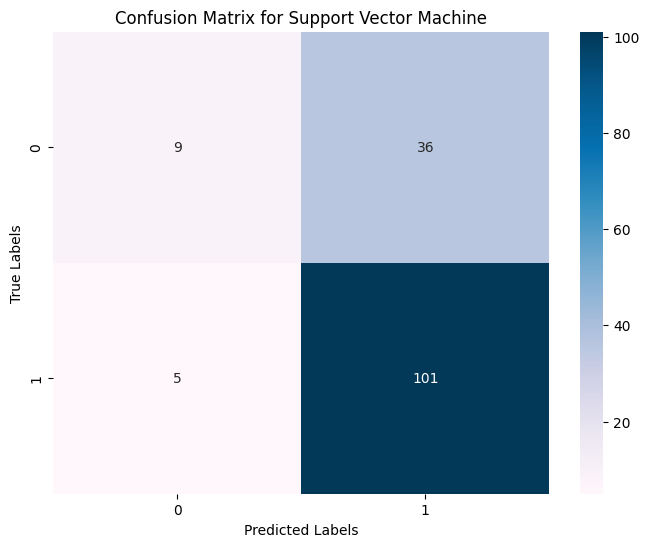

In [23]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Support Vector Machine')
#plt.savefig('CM_SVM.jpg', dpi=300)
plt.show()


In [24]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

print("ROC AUC Score: ", svm_roc_auc)


ROC AUC Score:  0.5764150943396227


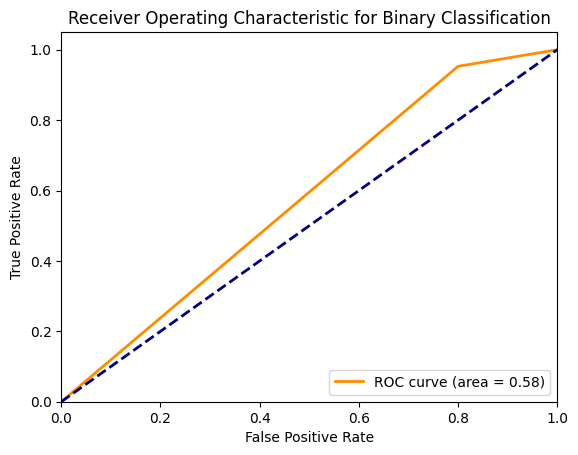

In [25]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_SVM.jpg', dpi=300)
plt.show()


## Random Forest (RF

In [26]:
# RF
# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate precision score and print classification report
rf_precision = precision_score(y_test, rf_predictions, average='macro')

print(classification_report(y_test, rf_predictions, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        45
           1       0.85      1.00      0.92       106

    accuracy                           0.87       151
   macro avg       0.92      0.79      0.83       151
weighted avg       0.89      0.87      0.86       151



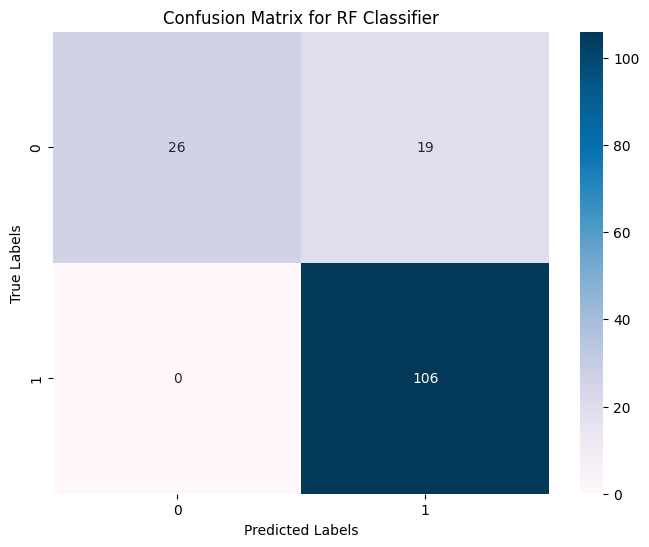

In [27]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RF Classifier')
#plt.savefig('CM_RF.jpg', dpi=300)
plt.show()


In [28]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

print("ROC AUC Score: ", rf_roc_auc)


ROC AUC Score:  0.7888888888888889


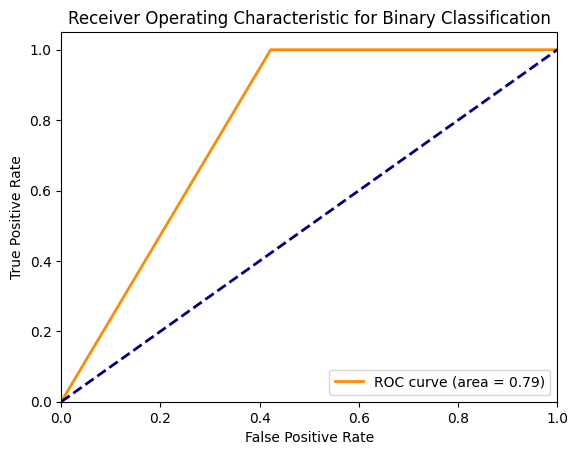

In [29]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_RF.jpg', dpi=300)
plt.show()


## CatBoost¶

In [31]:
#! pip install catboost

In [32]:
import catboost as cb

# Initialize and train the CatBoost model with specified parameters
catboost_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.1, depth=2, loss_function='Logloss')

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
catboost_predictions = catboost_model.predict(X_test)

# Calculate precision score and print classification report
catboost_precision = precision_score(y_test, catboost_predictions, average='macro')
print(classification_report(y_test, catboost_predictions, zero_division=1))


0:	learn: 0.6460276	total: 110ms	remaining: 55s
1:	learn: 0.6061374	total: 156ms	remaining: 38.9s
2:	learn: 0.5760565	total: 227ms	remaining: 37.7s
3:	learn: 0.5483413	total: 292ms	remaining: 36.3s
4:	learn: 0.5291702	total: 343ms	remaining: 34s
5:	learn: 0.5117104	total: 393ms	remaining: 32.3s
6:	learn: 0.4933239	total: 447ms	remaining: 31.5s
7:	learn: 0.4743534	total: 493ms	remaining: 30.3s
8:	learn: 0.4591579	total: 537ms	remaining: 29.3s
9:	learn: 0.4468228	total: 579ms	remaining: 28.4s
10:	learn: 0.4354460	total: 647ms	remaining: 28.7s
11:	learn: 0.4281272	total: 684ms	remaining: 27.8s
12:	learn: 0.4136159	total: 717ms	remaining: 26.9s
13:	learn: 0.4077753	total: 762ms	remaining: 26.5s
14:	learn: 0.3984966	total: 809ms	remaining: 26.2s
15:	learn: 0.3884679	total: 842ms	remaining: 25.5s
16:	learn: 0.3801509	total: 900ms	remaining: 25.6s
17:	learn: 0.3747470	total: 949ms	remaining: 25.4s
18:	learn: 0.3688561	total: 1s	remaining: 25.3s
19:	learn: 0.3641709	total: 1.05s	remaining: 25.

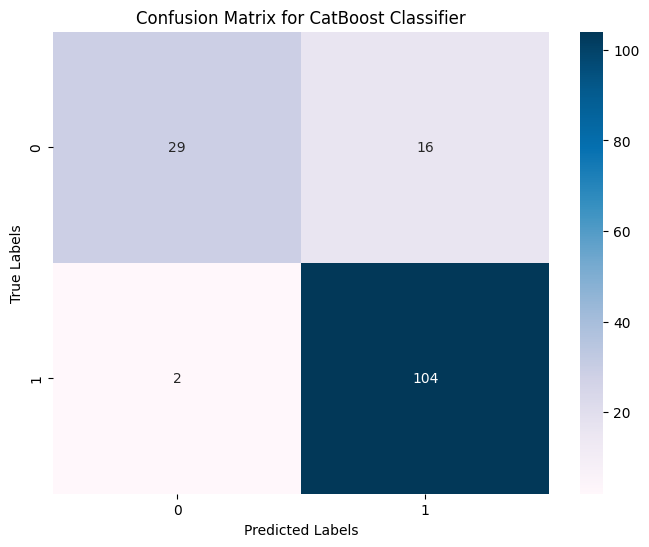

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, catboost_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CatBoost Classifier')
#plt.savefig('CM_CB.jpg', dpi=300)
plt.show()


In [34]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
cb_roc_auc = roc_auc_score(y_test, catboost_predictions)

print("ROC AUC Score: ", cb_roc_auc)


ROC AUC Score:  0.8127882599580712


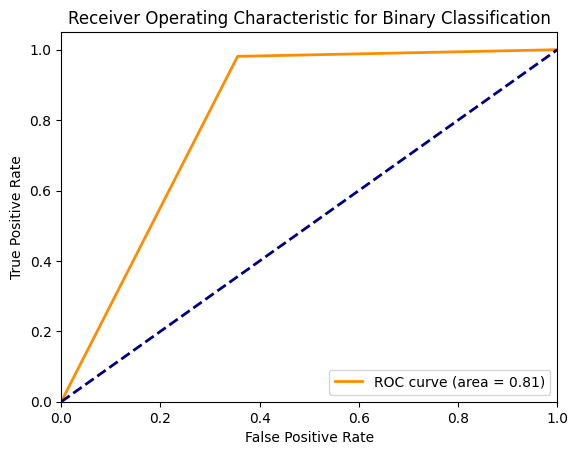

In [35]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, catboost_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_CB.jpg', dpi=300)
plt.show()


## XGBoost

In [36]:
# XGBoost Classifier
# It combines multiple decision trees to make predictions, focusing on areas where previous trees performed poorly
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Calculate precision score and print classification report
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
print(classification_report(y_test, xgb_predictions, zero_division=1))

# Calculate probabilities for ROC AUC
xgb_probabilities = xgb_model.predict_proba(X_test)



              precision    recall  f1-score   support

           0       1.00      0.69      0.82        45
           1       0.88      1.00      0.94       106

    accuracy                           0.91       151
   macro avg       0.94      0.84      0.88       151
weighted avg       0.92      0.91      0.90       151



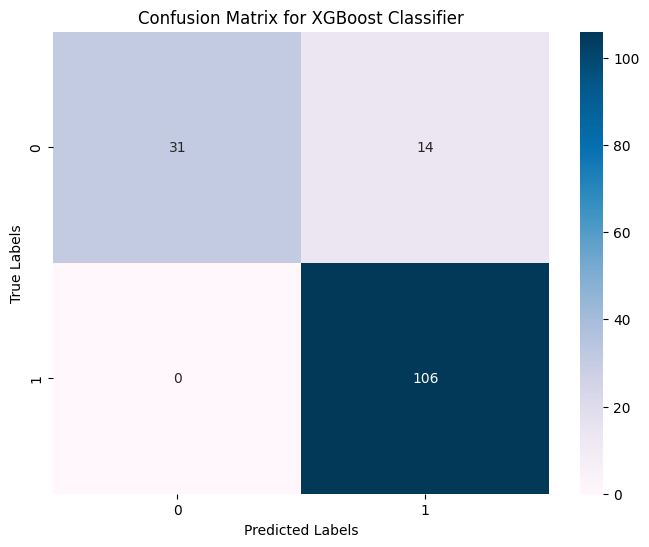

In [37]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
#plt.savefig('CM_XGB.jpg', dpi=300)
plt.show()


In [38]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)

print("ROC AUC Score: ", xgb_roc_auc)


ROC AUC Score:  0.8444444444444444


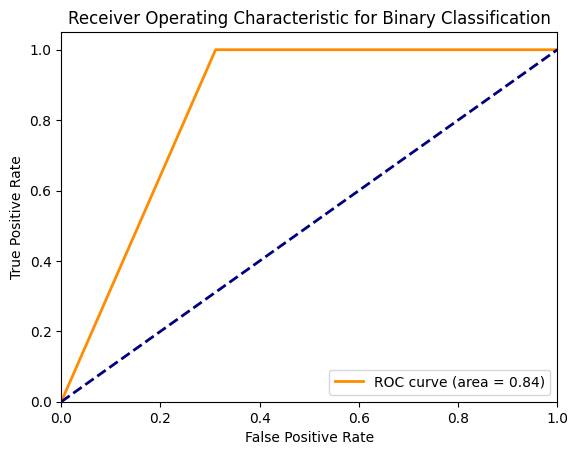

In [39]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, xgb_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_XGB.jpg', dpi=300)
plt.show()


## Artificial Neural Network (ANN)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# Train Artificial Neural Network
# It is used to build neural network models layer by layer in a sequential manner, where each layer
                     # flows sequentially from the input to the output.
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [42]:
# Obtain predictions from ANN
ann_predictions_proba = ann_model.predict(X_test)
ann_predictions = (ann_predictions_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [43]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, ann_predictions))


Accuracy: 0.4900662251655629


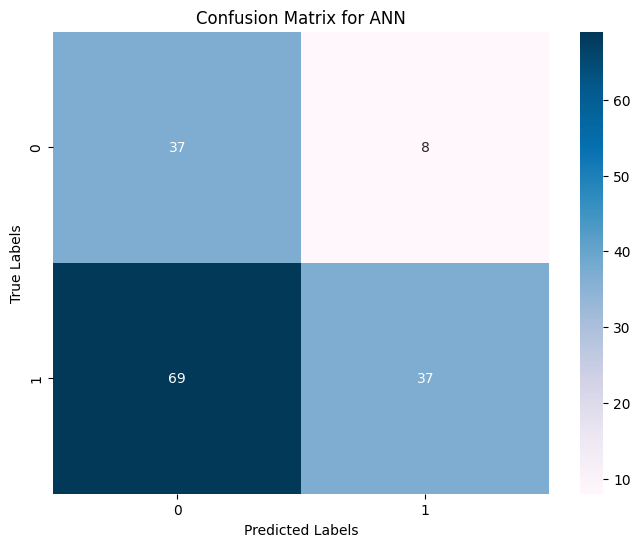

In [44]:
# # Generate confusion matriconf_matrix = confusion_matrix(y_test, ann_predictions)
conf_matrix = confusion_matrix(y_test, ann_predictions)
# Define class labels
class_labels = [0,1]  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ANN')
#plt.savefig('CM_ANN.jpg', dpi=300)
plt.show()


In [45]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
ann_roc_auc = roc_auc_score(y_test, ann_predictions)

print("ROC AUC Score: ",ann_roc_auc)


ROC AUC Score:  0.5856394129979036


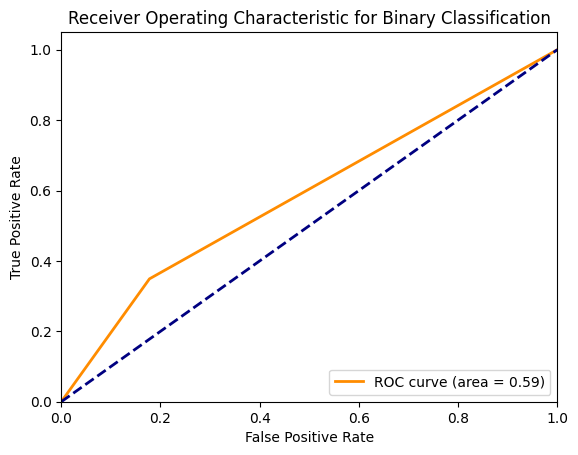

In [46]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, ann_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_ANN.jpg', dpi=300)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


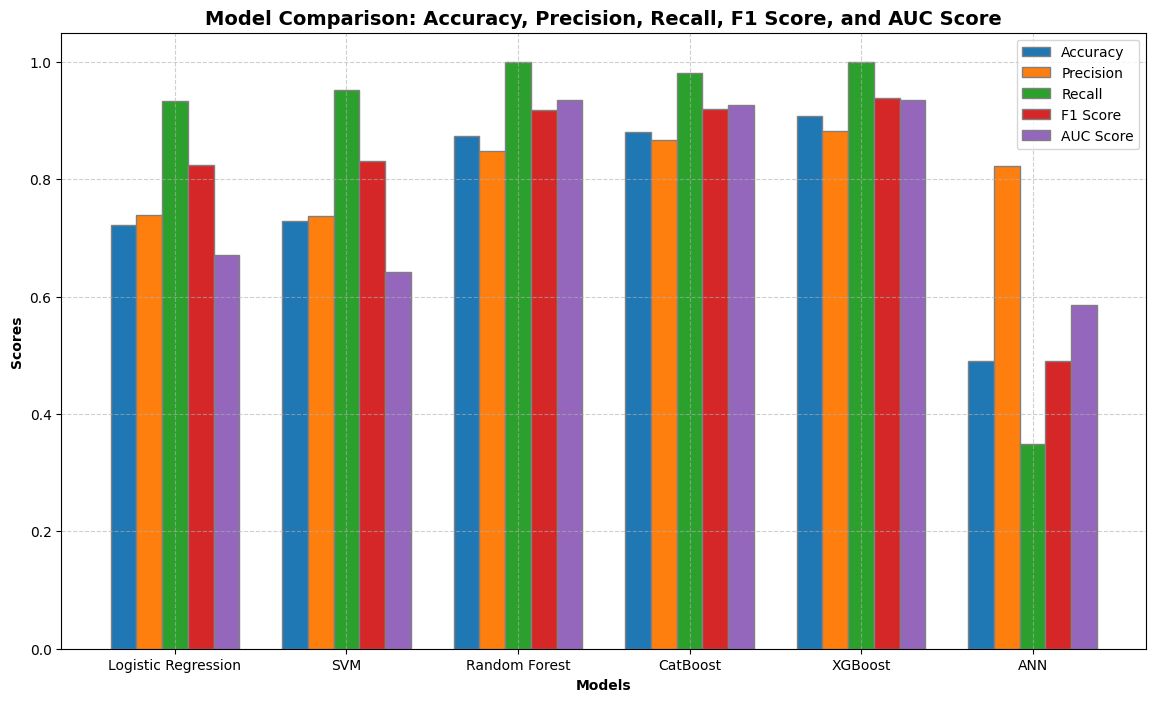

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test and y_test are your test dataset features and labels

# Generate predictions
logistic_pred = logistic_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions for ANN

# Calculate metrics for each model
models = ['Logistic Regression', 'SVM', 'Random Forest', 'CatBoost', 'XGBoost', 'ANN']

# Accuracy
accuracy_scores = [
    accuracy_score(y_test, logistic_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, catboost_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, ann_pred)
]

# Precision
precision_scores = [
    precision_score(y_test, logistic_pred),
    precision_score(y_test, svm_pred),
    precision_score(y_test, rf_pred),
    precision_score(y_test, catboost_pred),
    precision_score(y_test, xgb_pred),
    precision_score(y_test, ann_pred)
]

# Recall
recall_scores = [
    recall_score(y_test, logistic_pred),
    recall_score(y_test, svm_pred),
    recall_score(y_test, rf_pred),
    recall_score(y_test, catboost_pred),
    recall_score(y_test, xgb_pred),
    recall_score(y_test, ann_pred)
]

# F1 Score
f1_scores = [
    f1_score(y_test, logistic_pred),
    f1_score(y_test, svm_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, catboost_pred),
    f1_score(y_test, xgb_pred),
    f1_score(y_test, ann_pred)
]

# AUC Score (requires probability predictions)
logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))  # use decision_function for SVM
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
catboost_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
ann_auc = roc_auc_score(y_test, ann_model.predict(X_test).ravel())  # Use probabilities directly for AUC

auc_scores = [logistic_auc, svm_auc, rf_auc, catboost_auc, xgb_auc, ann_auc]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the bar chart
plt.figure(figsize=(14, 8))

plt.bar(r1, accuracy_scores, color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color=colors[3], width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r5, auc_scores, color=colors[4], width=bar_width, edgecolor='grey', label='AUC Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(models))], models)

# Add labels, title, and legend
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, and AUC Score', fontweight='bold', fontsize=14)
plt.legend()

# Enhance visual appeal
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('BFFSmodel_comparison_plot.png', dpi=500, bbox_inches='tight')

# Show the plot (optional)
plt.show()


## Apply XAI

In [48]:
  ! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.7 MB/s eta 0:00:00


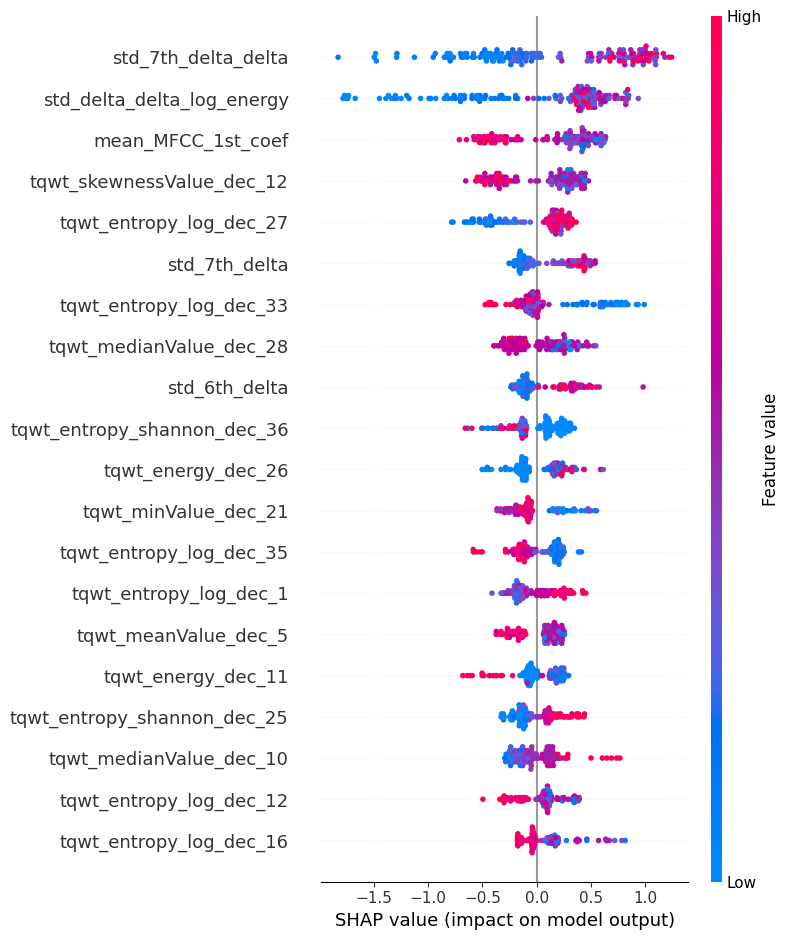

<Figure size 640x480 with 0 Axes>

In [49]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)  # Ensure X_test is used for predictions

# Create a new figure to ensure SHAP plot is rendered correctly
plt.figure(figsize=(10, 8))  # Adjust size as needed

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Save the plot to a file
plt.savefig('shap_summary_plot1.jpg', dpi=500, bbox_inches='tight')

# Optionally, show the plot to ensure it displays correctly
plt.show()


In [50]:


# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer(X)

# Convert X_test to a DataFrame if it's a numpy array
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# Visualize the SHAP values
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X.iloc[0,:])


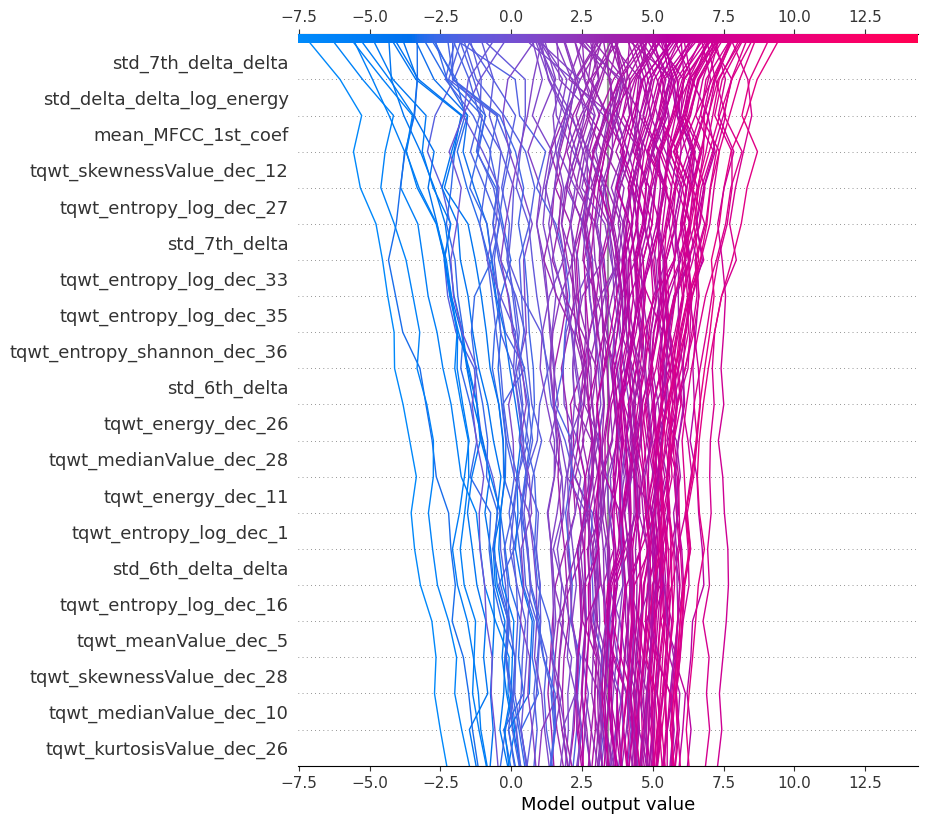

In [51]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model, X_test)  # Ensure explainer is created with the correct data

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Create a new figure for the plot
plt.figure(figsize=(10, 8))  # Adjust size as needed

# Generate SHAP decision plot
shap.decision_plot(explainer.expected_value, shap_values.values, X)

# Save the plot to a file
plt.savefig('shap_summary_plot5.jpg', dpi=500, bbox_inches='tight')

# Close the plot to free memory
plt.close()


In [52]:
# Import necessary libraries

import shap
import numpy as np

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Calculate mean absolute SHAP values for each feature
# The error is because shap_values is a list of arrays (one array for each class in the target variable)
# We need to calculate the mean absolute SHAP values across all classes
mean_shap_values = np.abs(shap_values[0]).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame(mean_shap_values, columns=['SHAP'], index=X.columns)

# Rank features by their importance
feature_ranking = feature_importance.sort_values(by='SHAP', ascending=False)

# Select top 150 features
selected_features = feature_ranking.head(150).index

# Print the selected features
print(selected_features)


Index(['gender', 'tqwt_medianValue_dec_6', 'tqwt_TKEO_std_dec_33',
       'tqwt_TKEO_std_dec_34', 'tqwt_TKEO_std_dec_35', 'tqwt_TKEO_std_dec_36',
       'tqwt_medianValue_dec_1', 'tqwt_medianValue_dec_2',
       'tqwt_medianValue_dec_3', 'tqwt_medianValue_dec_4',
       ...
       'tqwt_entropy_log_dec_30', 'tqwt_entropy_log_dec_32',
       'tqwt_TKEO_std_dec_5', 'tqwt_TKEO_mean_dec_30', 'tqwt_TKEO_mean_dec_21',
       'tqwt_TKEO_mean_dec_22', 'tqwt_TKEO_mean_dec_23',
       'tqwt_TKEO_mean_dec_24', 'tqwt_TKEO_mean_dec_25',
       'tqwt_TKEO_mean_dec_26'],
      dtype='object', length=150)


In [53]:
# Exploring Imabalance In Dataset
df['class'].value_counts()

,count
class,
1,563
0,192


In [54]:
# Extracting Features Into Features & Target
X = df.drop(['class'], axis=1)
y = df['class']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (755, 753)
Target (y) Shape Before Balancing : (755,)


In [55]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)
# Resampling Data
X, y = sm.fit_resample(X, y)

In [56]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (1126, 753)
Target (y) Shape After Balancing : (1126,)


In [57]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)
# Resampling Data
X_selected, y = sm.fit_resample(X[selected_features], y)

In [58]:
print('Feature (X) Shape After Balancing :', X_selected.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (1126, 150)
Target (y) Shape After Balancing : (1126,)


In [59]:
# Scaling features between -1 and 1  for mormalization
# Feature Scalling is a technique to standardize the independent features present in the data in a fixed range.
# i.e Iq = 90 and cgpa 2, then normalized it in a fixed range for better ml model.

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X_normalized = min_max_scaler.fit_transform(X_selected)



In [60]:

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (900, 150)
X_test shape: (226, 150)
y_train shape: (900,)
y_test shape: (226,)


## After XAI

In [61]:
# Logistic Regression
import warnings
# Ignoring all warnings
warnings.filterwarnings("ignore")
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
logistic_predictions = logistic_model.predict(X_test)

# Calculate precision score and print classification report
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
print(classification_report(y_test, logistic_predictions, zero_division=1))
#The average='macro' parameter calculates precision for each class and returns their unweighted mean.
# The zero_division=1 parameter handles cases where there are no true positives or true negatives, avoiding division by zero errors.



              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.87      0.82      0.84       119

    accuracy                           0.84       226
   macro avg       0.84      0.84      0.84       226
weighted avg       0.84      0.84      0.84       226



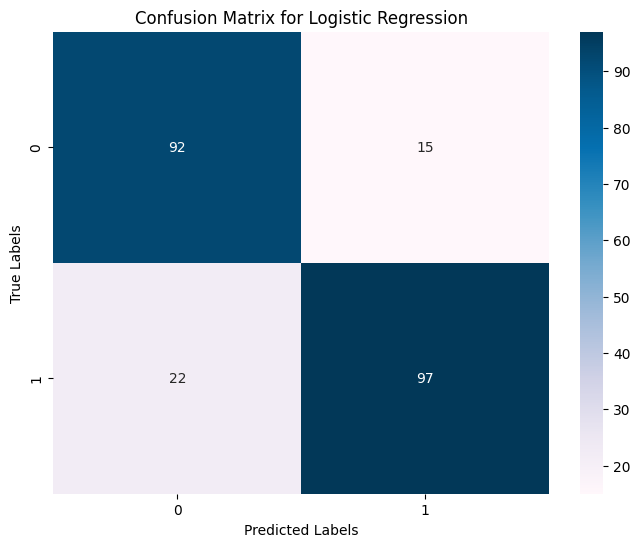

In [62]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
#plt.savefig('CM_LR.jpg', dpi=300)
plt.show()


In [63]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

print("ROC AUC Score: ", logistic_roc_auc)

ROC AUC Score:  0.8374695672661587


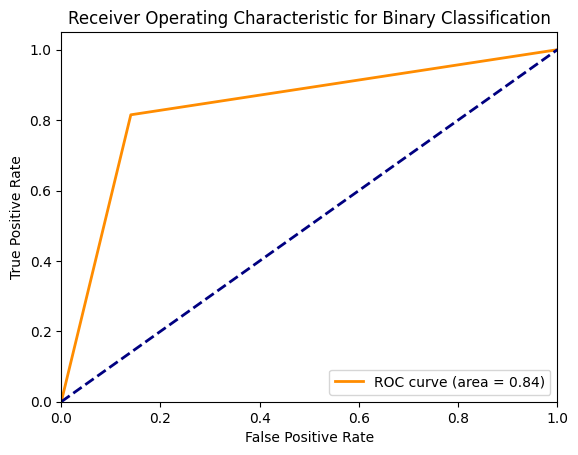

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_LR.jpg', dpi=300)
plt.show()


## Support Vector Machine (SVM)

In [65]:
# SVM
# Modelling Libraries
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate precision score and print classification report
svm_precision = precision_score(y_test, svm_predictions, average='macro')

print(classification_report(y_test, svm_predictions, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      0.72      0.76       107
           1       0.77      0.84      0.80       119

    accuracy                           0.78       226
   macro avg       0.79      0.78      0.78       226
weighted avg       0.78      0.78      0.78       226



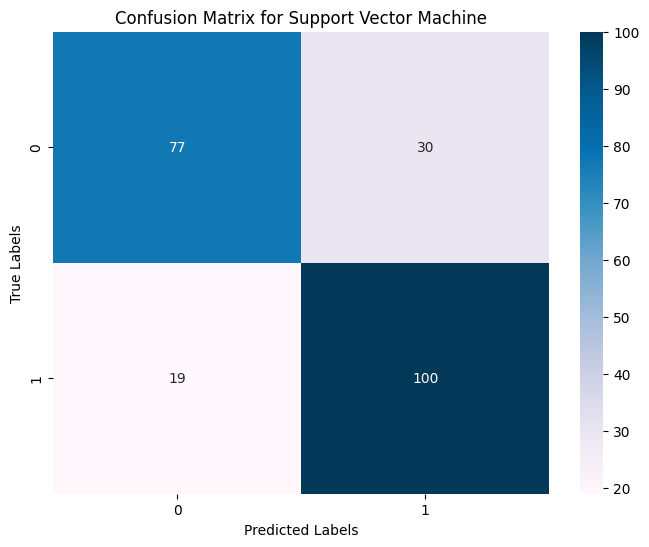

In [66]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Support Vector Machine')
#plt.savefig('CM_SVM.jpg', dpi=300)
plt.show()


In [67]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

print("ROC AUC Score: ", svm_roc_auc)


ROC AUC Score:  0.7799811513390403


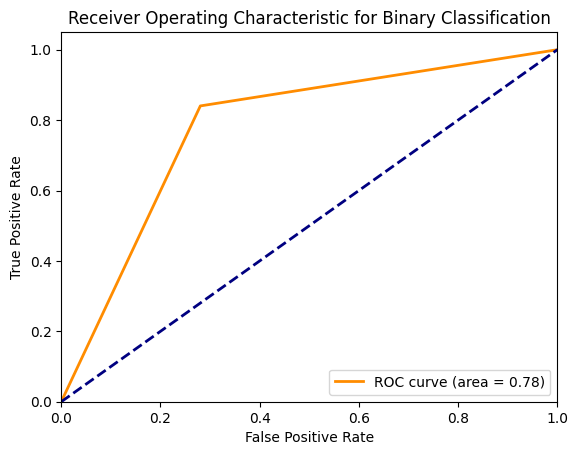

In [68]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_SVM.jpg', dpi=300)
plt.show()


## Random Forest (RF

In [69]:
# RF
# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate precision score and print classification report
rf_precision = precision_score(y_test, rf_predictions, average='macro')

print(classification_report(y_test, rf_predictions, zero_division=1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.95      0.93      0.94       119

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



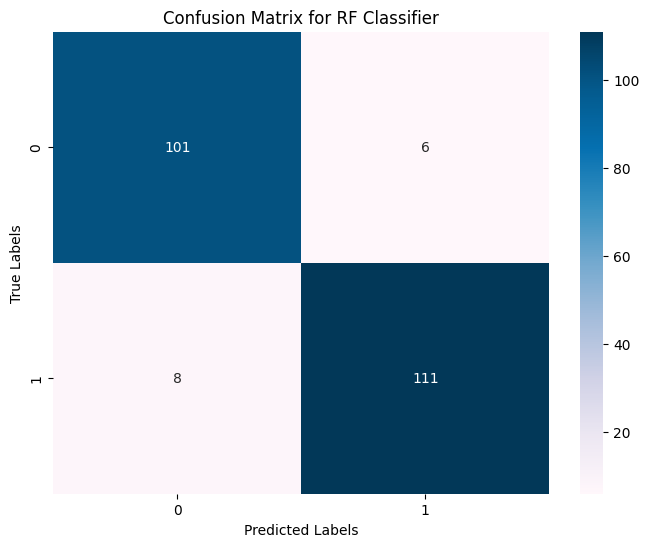

In [70]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RF Classifier')
#plt.savefig('CM_RF.jpg', dpi=300)
plt.show()


In [71]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

print("ROC AUC Score: ", rf_roc_auc)


ROC AUC Score:  0.9383491714442787


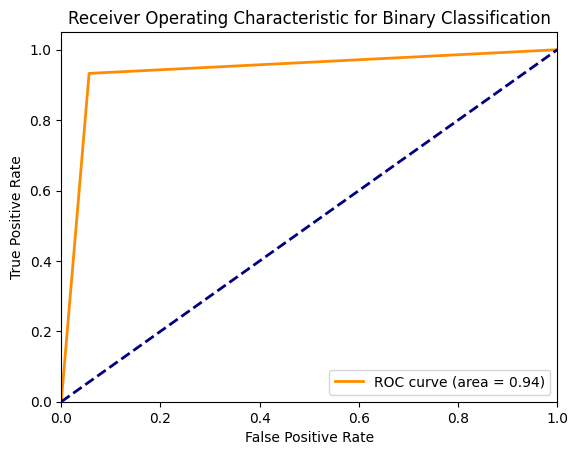

In [72]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_RF.jpg', dpi=300)
plt.show()


## CatBoost¶

In [73]:
# ! pip install catboost

In [74]:
import catboost as cb

# Initialize and train the CatBoost model with specified parameters
catboost_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.1, depth=2, loss_function='Logloss')

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
catboost_predictions = catboost_model.predict(X_test)

# Calculate precision score and print classification report
catboost_precision = precision_score(y_test, catboost_predictions, average='macro')
print(classification_report(y_test, catboost_predictions, zero_division=1))


0:	learn: 0.6600729	total: 10.5ms	remaining: 5.22s
1:	learn: 0.6330648	total: 18.5ms	remaining: 4.62s
2:	learn: 0.6112961	total: 23.9ms	remaining: 3.96s
3:	learn: 0.5966208	total: 29.2ms	remaining: 3.62s
4:	learn: 0.5802974	total: 35ms	remaining: 3.47s
5:	learn: 0.5649409	total: 40.1ms	remaining: 3.31s
6:	learn: 0.5547013	total: 45.9ms	remaining: 3.23s
7:	learn: 0.5455541	total: 51.6ms	remaining: 3.17s
8:	learn: 0.5335843	total: 57.9ms	remaining: 3.16s
9:	learn: 0.5232209	total: 62.5ms	remaining: 3.06s
10:	learn: 0.5155697	total: 70.1ms	remaining: 3.12s
11:	learn: 0.5051867	total: 80.2ms	remaining: 3.26s
12:	learn: 0.4922114	total: 90.1ms	remaining: 3.37s
13:	learn: 0.4863016	total: 99.9ms	remaining: 3.47s
14:	learn: 0.4814718	total: 111ms	remaining: 3.6s
15:	learn: 0.4753504	total: 122ms	remaining: 3.7s
16:	learn: 0.4698670	total: 133ms	remaining: 3.79s
17:	learn: 0.4633401	total: 144ms	remaining: 3.86s
18:	learn: 0.4549642	total: 154ms	remaining: 3.91s
19:	learn: 0.4488343	total: 165

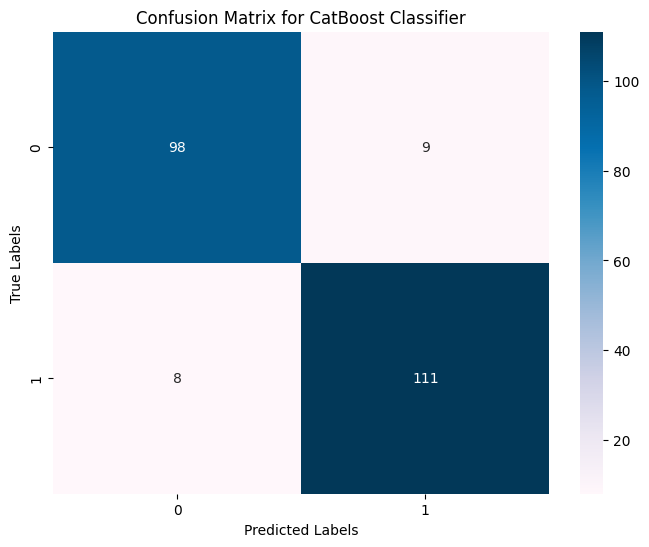

In [75]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, catboost_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CatBoost Classifier')
#plt.savefig('CM_CB.jpg', dpi=300)
plt.show()


In [76]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
cb_roc_auc = roc_auc_score(y_test, catboost_predictions)

print("ROC AUC Score: ", cb_roc_auc)


ROC AUC Score:  0.9243304798554935


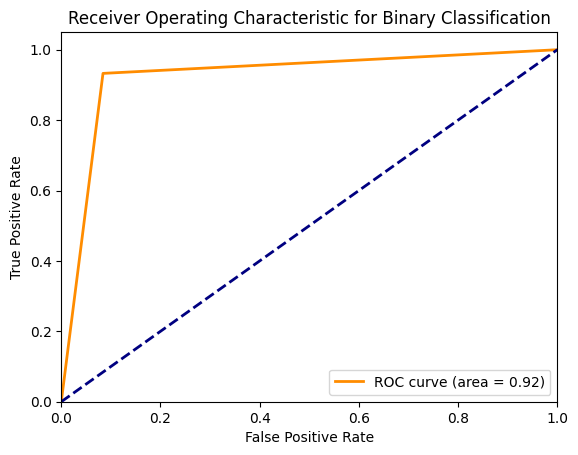

In [77]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, catboost_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_CB.jpg', dpi=300)
plt.show()


## XGBoost

In [78]:
# XGBoost Classifier
# It combines multiple decision trees to make predictions, focusing on areas where previous trees performed poorly
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Calculate precision score and print classification report
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
print(classification_report(y_test, xgb_predictions, zero_division=1))

# Calculate probabilities for ROC AUC
xgb_probabilities = xgb_model.predict_proba(X_test)



              precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.97      0.94      0.96       119

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



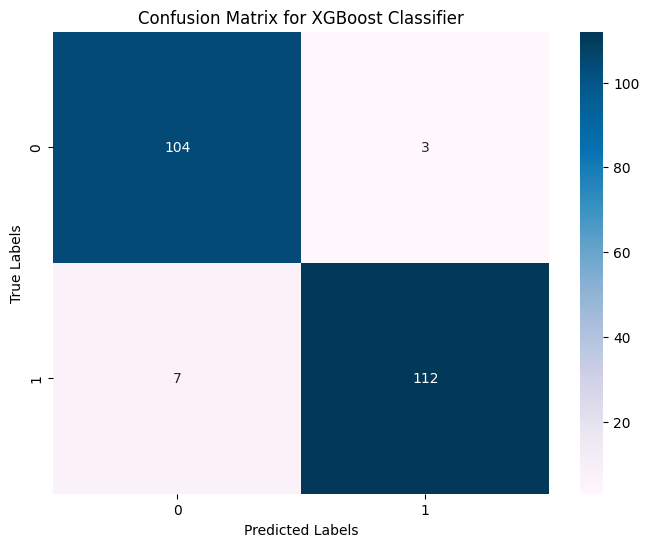

In [79]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
#plt.savefig('CM_XGB.jpg', dpi=300)
plt.show()


In [80]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)

print("ROC AUC Score: ", xgb_roc_auc)


ROC AUC Score:  0.9565695437053325


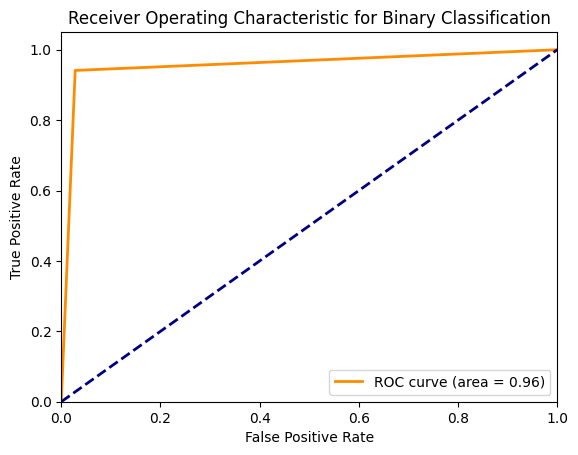

In [81]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, xgb_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
#plt.savefig('AUC_XGB.jpg', dpi=300)
plt.show()


## Artificial Neural Network (ANN)


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
# Train Artificial Neural Network
# It is used to build neural network models layer by layer in a sequential manner, where each layer
                     # flows sequentially from the input to the output.
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [84]:
# Obtain predictions from ANN
ann_predictions_proba = ann_model.predict(X_test)
ann_predictions = (ann_predictions_proba > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [85]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, ann_predictions))


Accuracy: 0.9557522123893806


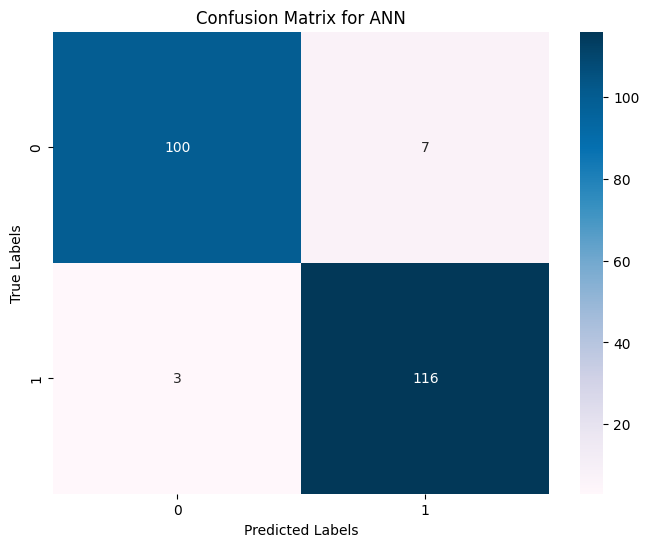

In [86]:
# # Generate confusion matriconf_matrix = confusion_matrix(y_test, ann_predictions)
conf_matrix = confusion_matrix(y_test, ann_predictions)
# Define class labels
class_labels = [0,1]  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ANN')
#plt.savefig('CM_ANN.jpg', dpi=300)
plt.show()


In [87]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
ann_roc_auc = roc_auc_score(y_test, ann_predictions)

print("ROC AUC Score: ",ann_roc_auc)


ROC AUC Score:  0.9546846776093615


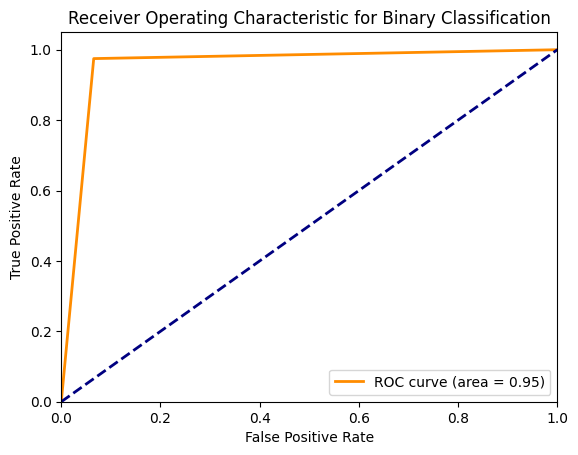

In [88]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, ann_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_ANN.jpg', dpi=300)
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


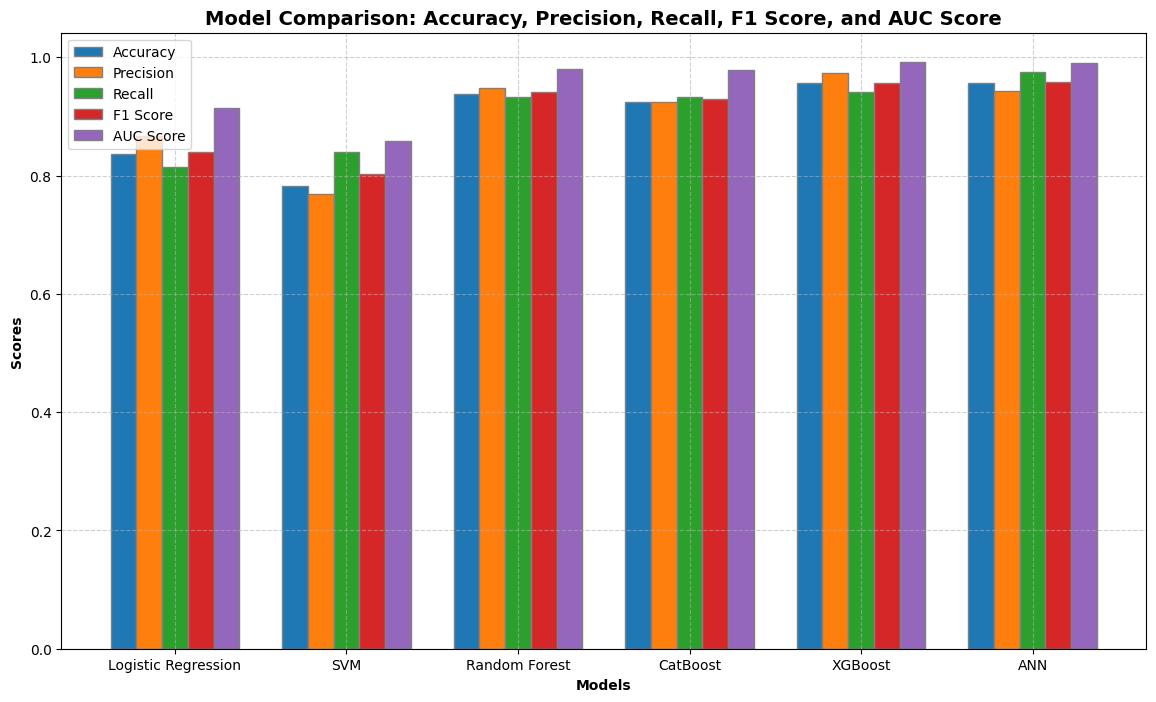

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test and y_test are your test dataset features and labels

# Generate predictions
logistic_pred = logistic_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions for ANN

# Calculate metrics for each model
models = ['Logistic Regression', 'SVM', 'Random Forest', 'CatBoost', 'XGBoost', 'ANN']

# Accuracy
accuracy_scores = [
    accuracy_score(y_test, logistic_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, catboost_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, ann_pred)
]

# Precision
precision_scores = [
    precision_score(y_test, logistic_pred),
    precision_score(y_test, svm_pred),
    precision_score(y_test, rf_pred),
    precision_score(y_test, catboost_pred),
    precision_score(y_test, xgb_pred),
    precision_score(y_test, ann_pred)
]

# Recall
recall_scores = [
    recall_score(y_test, logistic_pred),
    recall_score(y_test, svm_pred),
    recall_score(y_test, rf_pred),
    recall_score(y_test, catboost_pred),
    recall_score(y_test, xgb_pred),
    recall_score(y_test, ann_pred)
]

# F1 Score
f1_scores = [
    f1_score(y_test, logistic_pred),
    f1_score(y_test, svm_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, catboost_pred),
    f1_score(y_test, xgb_pred),
    f1_score(y_test, ann_pred)
]

# AUC Score (requires probability predictions)
logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))  # use decision_function for SVM
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
catboost_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
ann_auc = roc_auc_score(y_test, ann_model.predict(X_test).ravel())  # Use probabilities directly for AUC

auc_scores = [logistic_auc, svm_auc, rf_auc, catboost_auc, xgb_auc, ann_auc]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the bar chart
plt.figure(figsize=(14, 8))

plt.bar(r1, accuracy_scores, color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color=colors[3], width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r5, auc_scores, color=colors[4], width=bar_width, edgecolor='grey', label='AUC Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(models))], models)

# Add labels, title, and legend
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, and AUC Score', fontweight='bold', fontsize=14)
plt.legend()

# Enhance visual appeal
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('model_comparison_plot.png', dpi=500, bbox_inches='tight')

# Show the plot (optional)
plt.show()


# Ensemble Learning
## Stacking
      Ensemble methods combine multiple individual models to create a more powerful and accurate predictive model

### RF-CatBoost-MLP Classifier

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


# Base classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Meta classifier
meta_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Stacking Classifier
stacking_classifier1 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('catboost', catboost_classifier), ('ann', ann_classifier)],
    final_estimator=meta_classifier,
    cv=5
)

# Training the stacking classifier
stacking_classifier1.fit(X_train, y_train)

# Predictions
predictions1 = stacking_classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions1)

# Calculate precision
precision = precision_score(y_test, predictions1, average='macro')

# Calculate recall (sensitivity)
recall = recall_score(y_test, predictions1, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, predictions1, average='macro')

# Print classification report
print(classification_report(y_test, predictions1, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.95       119

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226

Accuracy: 0.9513
Precision: 0.9514
Recall (Sensitivity): 0.9510
F1 Score: 0.9512


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.95       119

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226

Accuracy: 0.9513
Precision: 0.9514
Recall (Sensitivity): 0.9510
F1 Score: 0.9512
Final ANN Base Classifier Loss: 0.1314
Final Meta Classifier Loss: 0.1314


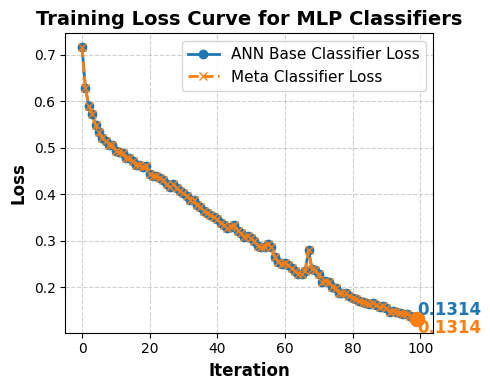

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Fit the base models individually to track their loss curves
rf_classifier.fit(X_train, y_train)  # RandomForestClassifier doesn't provide loss curves
catboost_classifier.fit(X_train, y_train)  # CatBoostClassifier doesn't provide loss curves

# Fit and track loss for the ANN classifier
ann_classifier.fit(X_train, y_train)
ann_loss_curve = ann_classifier.loss_curve_

# Fit and track loss for the meta classifier
meta_classifier.fit(X_train, y_train)
meta_loss_curve = meta_classifier.loss_curve_

# Stacking Classifier Training (no direct loss tracking)
stacking_classifier1.fit(X_train, y_train)

# Predictions
predictions1 = stacking_classifier1.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1, average='macro')
recall = recall_score(y_test, predictions1, average='macro')
f1 = f1_score(y_test, predictions1, average='macro')

# Print classification report
print(classification_report(y_test, predictions1, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the final loss values
print(f'Final ANN Base Classifier Loss: {ann_loss_curve[-1]:.4f}')
print(f'Final Meta Classifier Loss: {meta_loss_curve[-1]:.4f}')

# Enhanced plotting
plt.figure(figsize=(5, 4))
plt.plot(
    ann_loss_curve,
    label='ANN Base Classifier Loss',
    color='#1f77b4',
    linestyle='-',
    marker='o',
    markersize=6,
    linewidth=2
)
plt.plot(
    meta_loss_curve,
    label='Meta Classifier Loss',
    color='#ff7f0e',
    linestyle='--',
    marker='x',
    markersize=6,
    linewidth=2
)

# Highlight the final points on the curves
plt.scatter(len(ann_loss_curve) - 1, ann_loss_curve[-1], color='#1f77b4', s=100, zorder=5)
plt.scatter(len(meta_loss_curve) - 1, meta_loss_curve[-1], color='#ff7f0e', s=100, zorder=5)

# Annotating the final loss values
plt.text(len(ann_loss_curve) - 1, ann_loss_curve[-1], f'{ann_loss_curve[-1]:.4f}',
         fontsize=12, ha='left', va='bottom', color='#1f77b4', weight='bold')
plt.text(len(meta_loss_curve) - 1, meta_loss_curve[-1], f'{meta_loss_curve[-1]:.4f}',
         fontsize=12, ha='left', va='top', color='#ff7f0e', weight='bold')

# Customizing the plot
plt.xlabel('Iteration', fontsize=12, weight='bold')
plt.ylabel('Loss', fontsize=12, weight='bold')
plt.title('Training Loss Curve for MLP Classifiers', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11, loc='upper right')

# Adjust the layout and save the plot
plt.tight_layout()
plt.savefig('Loss_RF_CB_MLP.jpg', dpi=500)
plt.show()


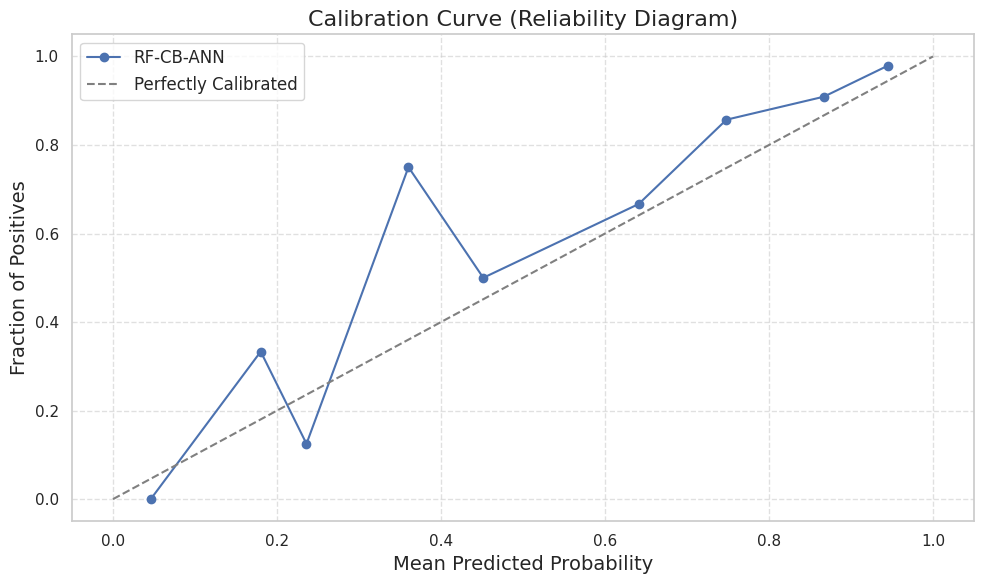

In [141]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

# Calibrate the stacking classifier using sigmoid calibration
calibrated_stacking_clf = CalibratedClassifierCV(stacking_classifier1, method='sigmoid', cv=5)
calibrated_stacking_clf.fit(X_train, y_train)

# Predict probabilities on the test set
prob_pos = calibrated_stacking_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve values
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='RF-CB-ANN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

# Customizing the plot
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('Calibration Curve (Reliability Diagram)', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and display the plot
plt.tight_layout()
plt.savefig('Calibration_Curve_RF-CB-ANN.jpg', dpi=300)
plt.show()


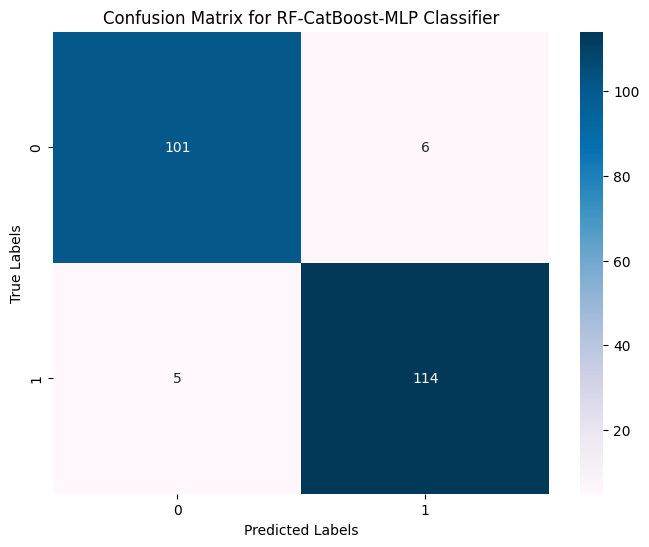

In [94]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=stacking_classifier1.classes_, yticklabels=stacking_classifier1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RF-CatBoost-MLP Classifier')
plt.savefig('CM_RF_CB_MLP.jpg', dpi=500)
plt.show()




In [95]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
rfcbann_roc_auc = roc_auc_score(y_test, predictions1)

print("ROC AUC Score: ", rfcbann_roc_auc)


ROC AUC Score:  0.9509542134610854


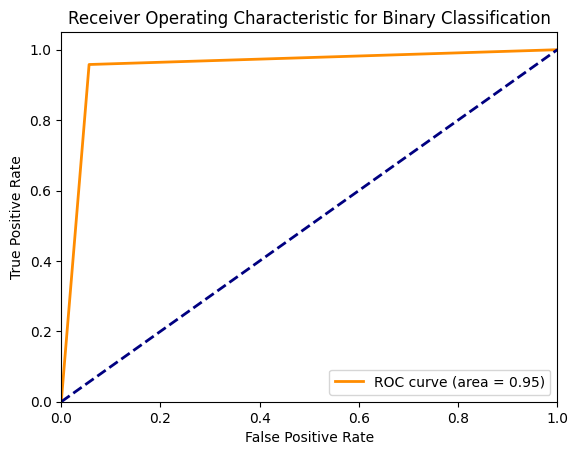

In [96]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, predictions1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_RF_CB_MLP.jpg', dpi=300)
plt.show()


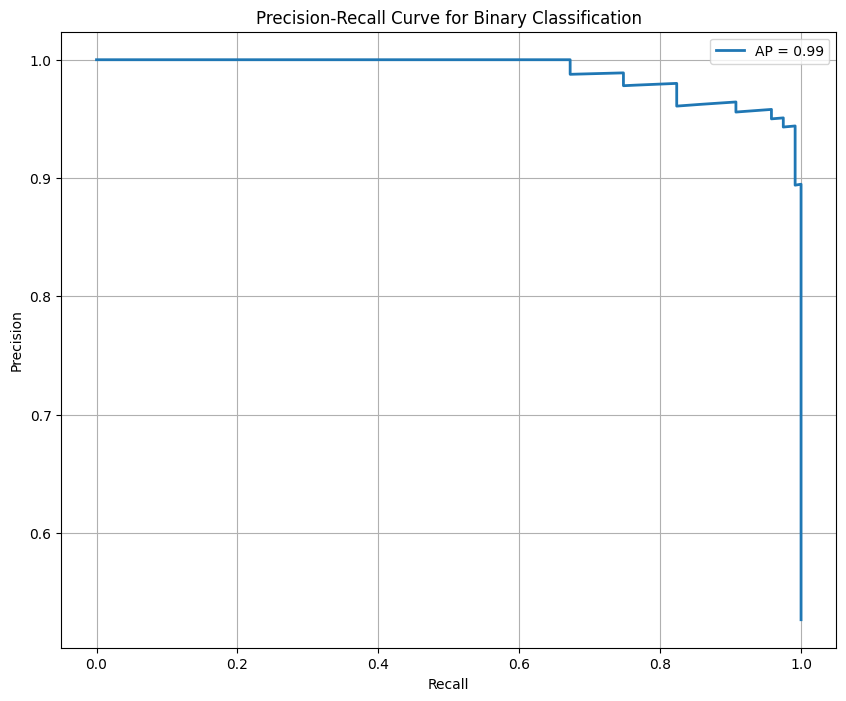

In [97]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Ensure the model outputs probability predictions
# predictions_prob should contain probabilities for the positive class (disease)
predictions_prob = stacking_classifier1.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc="upper right")
plt.grid()
plt.savefig('PR_RF_CB_MLP1.jpg', dpi=300)
plt.show()


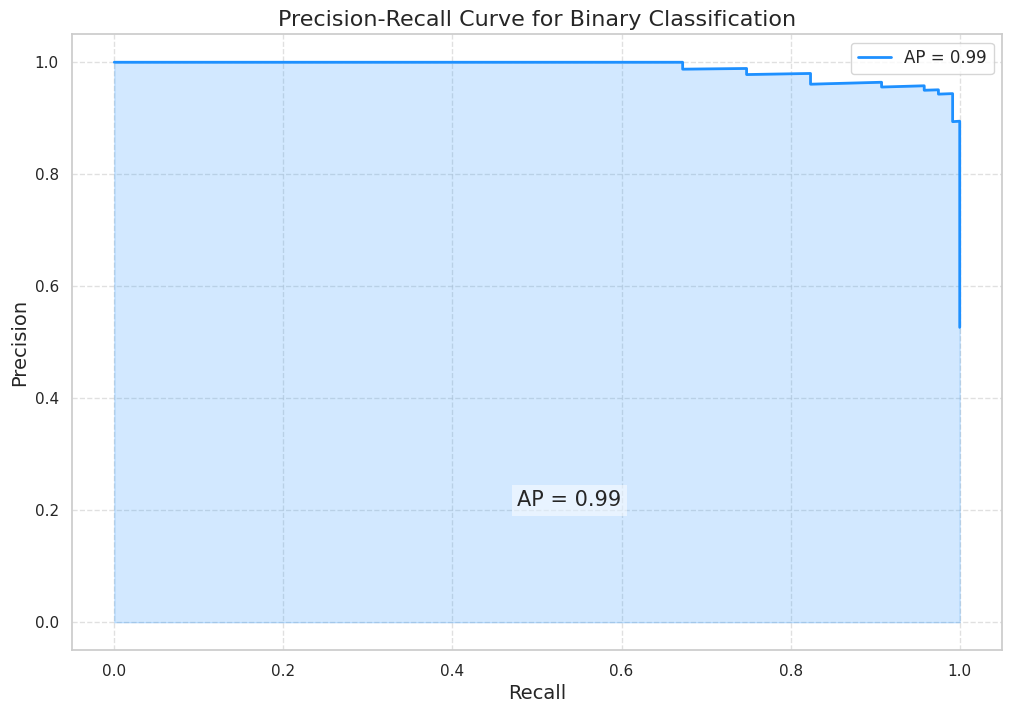

In [98]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model outputs probability predictions
# predictions_prob should contain probabilities for the positive class (disease)
predictions_prob = stacking_classifier1.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Set up the color palette
sns.set(style="whitegrid")

# Plotting the Precision-Recall Curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='dodgerblue', lw=2, linestyle='-', label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, precision, alpha=0.2, color='dodgerblue')

# Adding annotations
plt.text(0.6, 0.2, f'AP = {average_precision:.2f}', fontsize=15, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Customize labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Binary Classification', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('PR_RF_CB_MLP2.jpg', dpi=300)
plt.show()


In [99]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, predictions1)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9023


In [100]:
from sklearn.metrics import matthews_corrcoef

# Calculate MCC
mcc = matthews_corrcoef(y_test, predictions1)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9024


RF-ANN Classifier

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.96      0.90      0.93       119

    accuracy                           0.92       226
   macro avg       0.93      0.93      0.92       226
weighted avg       0.93      0.92      0.92       226

Accuracy: 0.9248
Precision: 0.9250
Recall (Sensitivity): 0.9262
F1 Score: 0.9247
Final ANN Model Loss: 0.0846


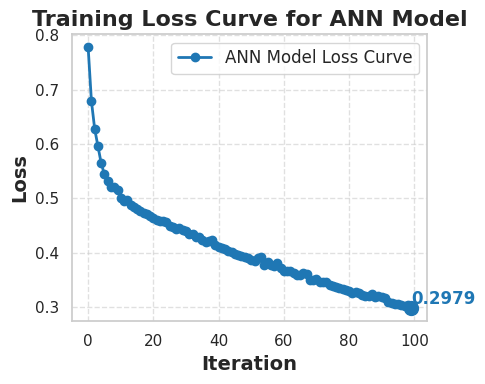

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Artificial Neural Network (ANN) model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Track the loss curve for ANN
ann_loss_curve = ann_model.loss_curve_

# Combine classifiers in stacking classifier
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
stacking_classifier2 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('ann', ann_model)],
    final_estimator=meta_classifier,
    cv=5
)

# Training the stacking classifier
stacking_classifier2.fit(X_train, y_train)

# Predictions
predictions2 = stacking_classifier2.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions2)
precision = precision_score(y_test, predictions2, average='macro')
recall = recall_score(y_test, predictions2, average='macro')
f1 = f1_score(y_test, predictions2, average='macro')

# Print classification report
print(classification_report(y_test, predictions2, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print final loss values
if ann_loss_curve:  # Check if the loss curve is available
    print(f'Final ANN Model Loss: {ann_loss_curve[-1]:.4f}')

# Enhanced plotting
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))

# Plot the loss curve, limiting to 100 iterations
iterations_to_plot = min(100, len(ann_loss_curve))  # Limit to the first 100 iterations or the available ones
plt.plot(
    ann_loss_curve[:iterations_to_plot],
    label='ANN Model Loss Curve',
    color='#1f77b4',
    linestyle='-',
    marker='o',
    markersize=6,
    linewidth=2
)

# Highlight the final point on the curve
plt.scatter(iterations_to_plot - 1, ann_loss_curve[iterations_to_plot - 1], color='#1f77b4', s=100, zorder=5)

# Annotating the final loss value
plt.text(
    iterations_to_plot - 1,
    ann_loss_curve[iterations_to_plot - 1],
    f'{ann_loss_curve[iterations_to_plot - 1]:.4f}',
    fontsize=12,
    ha='left',
    va='bottom',
    color='#1f77b4',
    weight='bold'
)

# Customizing the plot
plt.xlabel('Iteration', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.title('Training Loss Curve for ANN Model', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('Loss_RF_ANN.jpg', dpi=500)
plt.show()


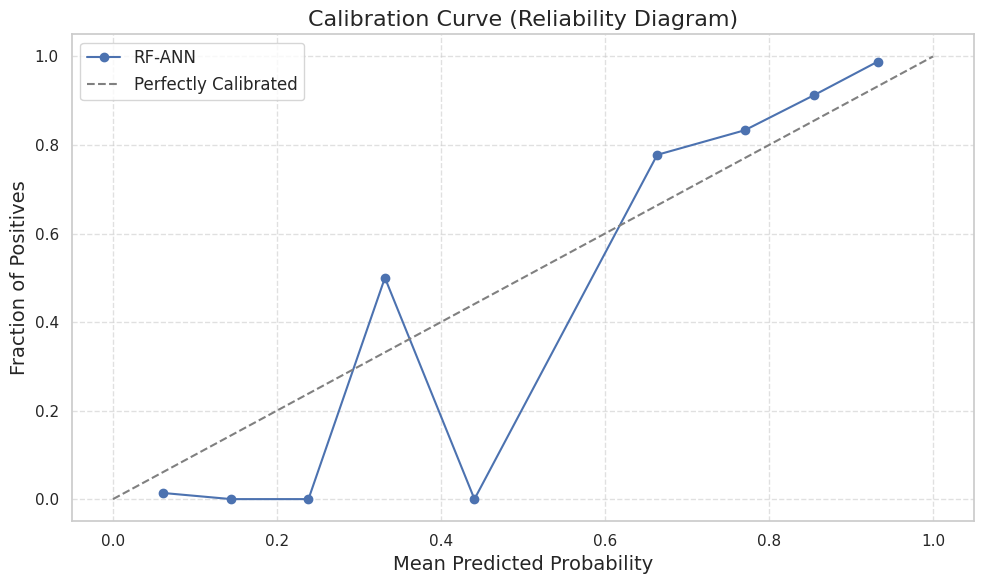

In [142]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

# Calibrate the stacking classifier using sigmoid calibration
calibrated_stacking_clf = CalibratedClassifierCV(stacking_classifier2, method='sigmoid', cv=5)
calibrated_stacking_clf.fit(X_train, y_train)

# Predict probabilities on the test set
prob_pos = calibrated_stacking_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve values
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='RF-ANN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

# Customizing the plot
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('Calibration Curve (Reliability Diagram)', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and display the plot
plt.tight_layout()
plt.savefig('Calibration_Curve_RF-ANN.jpg', dpi=300)
plt.show()


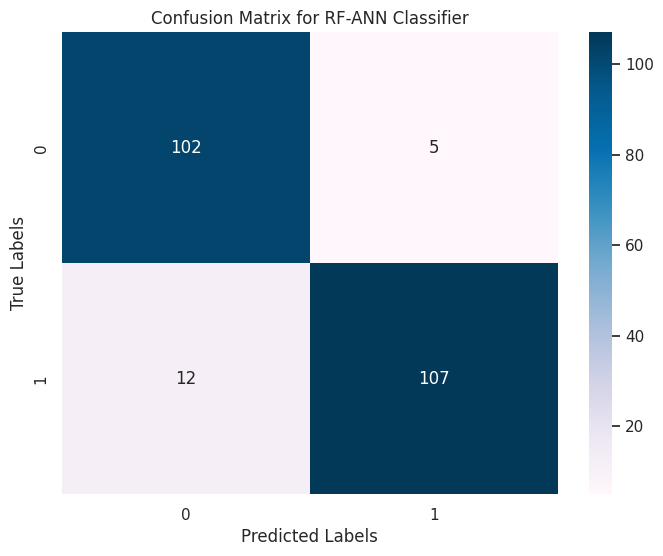

In [104]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=stacking_classifier2.classes_, yticklabels=stacking_classifier2.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RF-ANN Classifier')
plt.savefig('CM_RF_ANN.jpg', dpi=300)
plt.show()


In [105]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
rfann_roc_auc = roc_auc_score(y_test, predictions2)

print("ROC AUC Score: ", rfann_roc_auc)


ROC AUC Score:  0.9262153459514647


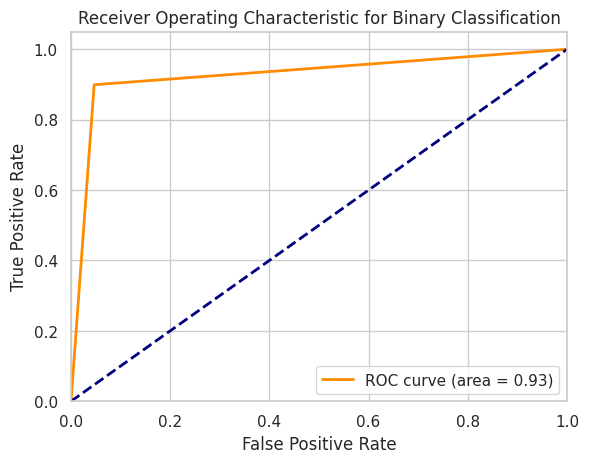

In [106]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, predictions2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_RF_ANN.jpg', dpi=300)
plt.show()


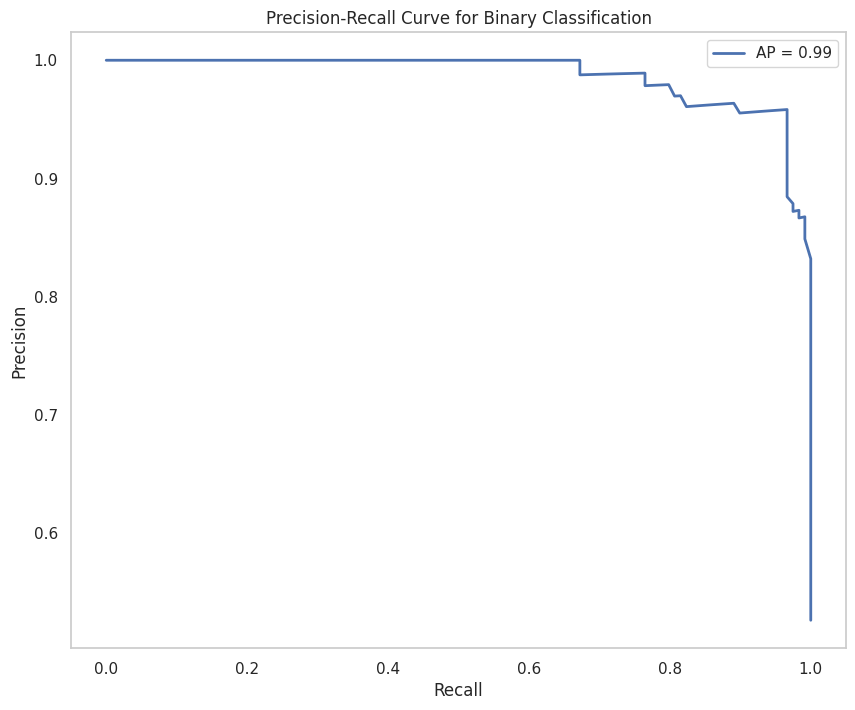

In [107]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Ensure the model outputs probability predictions
# predictions_prob should contain probabilities for the positive class (disease)
predictions_prob = stacking_classifier2.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc="upper right")
plt.grid()
plt.savefig('PR_RF_ANN1.jpg', dpi=300)
plt.show()


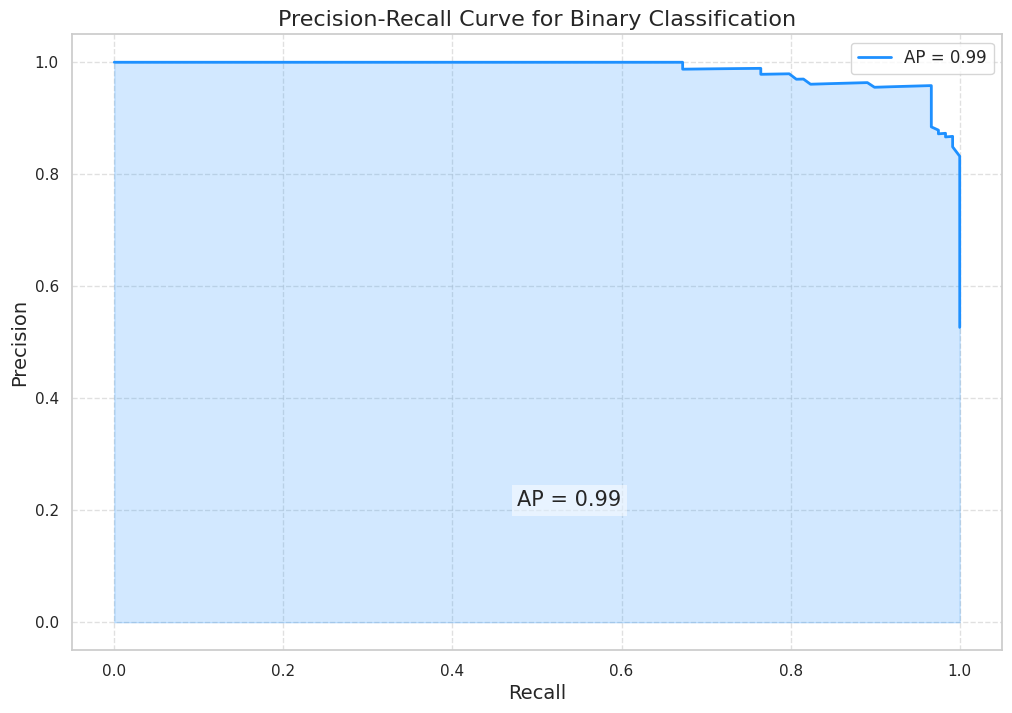

In [130]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model outputs probability predictions
# predictions_prob should contain probabilities for the positive class (disease)
predictions_prob = stacking_classifier2.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Set up the color palette
sns.set(style="whitegrid")

# Plotting the Precision-Recall Curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='dodgerblue', lw=2, linestyle='-', label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, precision, alpha=0.2, color='dodgerblue')

# Adding annotations
plt.text(0.6, 0.2, f'AP = {average_precision:.2f}', fontsize=15, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Customize labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Binary Classification', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('PR_RF_ANN2.jpg', dpi=500)
plt.show()


## SVM-ANN

In [136]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# Initialize SVM and ANN classifiers
svm_clf = SVC(kernel='linear', probability=True)  # Linear SVM for simplicity, you can try different kernels
ann_clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000)  # Single hidden layer ANN, you can adjust parameters

# Initialize the stacking classifier with the base classifiers and a meta-classifier
estimators = [('svm', svm_clf), ('ann', ann_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC())

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.96      0.91      0.94       119

    accuracy                           0.93       226
   macro avg       0.93      0.94      0.93       226
weighted avg       0.94      0.93      0.93       226

Accuracy: 0.9336
Precision: 0.9339
Recall (Sensitivity): 0.9351
F1 Score: 0.9336


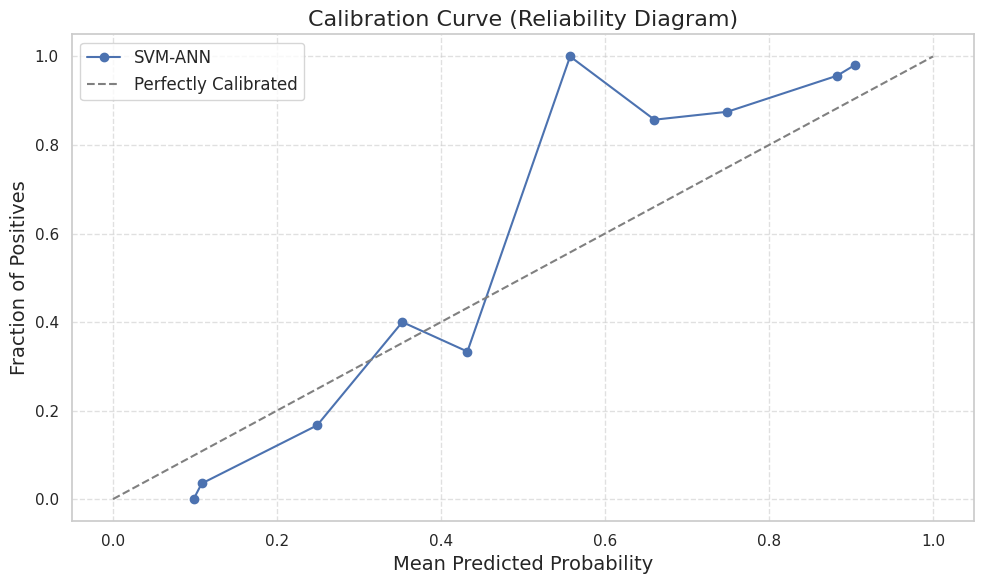

In [143]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

# Calibrate the stacking classifier using sigmoid calibration
calibrated_stacking_clf = CalibratedClassifierCV(stacking_clf, method='sigmoid', cv=5)
calibrated_stacking_clf.fit(X_train, y_train)

# Predict probabilities on the test set
prob_pos = calibrated_stacking_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve values
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='SVM-ANN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

# Customizing the plot
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('Calibration Curve (Reliability Diagram)', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and display the plot
plt.tight_layout()
plt.savefig('Calibration_Curve_SVM_ANN.jpg', dpi=300)
plt.show()


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.90      0.84      0.87       119

    accuracy                           0.87       226
   macro avg       0.87      0.87      0.87       226
weighted avg       0.87      0.87      0.87       226

Accuracy: 0.8673
Precision: 0.8678
Recall (Sensitivity): 0.8688
F1 Score: 0.8672
Final ANN Model Loss: 0.0846


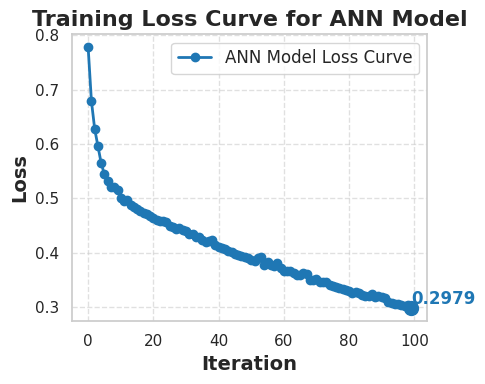

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are your training and testing data


svm_clf = SVC(kernel='linear', probability=True)  # Linear SVM for simplicity, you can try different kernels
ann_clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100)  # Single hidden layer ANN, you can adjust parameters

# Initialize the stacking classifier with the base classifiers and a meta-classifier
estimators = [('svm', svm_clf), ('ann', ann_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC())

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



# Print final loss values
if ann_loss_curve:  # Check if the loss curve is available
    print(f'Final ANN Model Loss: {ann_loss_curve[-1]:.4f}')

# Enhanced plotting
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))

# Plot the loss curve, limiting to 100 iterations
iterations_to_plot = min(100, len(ann_loss_curve))  # Limit to the first 100 iterations or the available ones
plt.plot(
    ann_loss_curve[:iterations_to_plot],
    label='ANN Model Loss Curve',
    color='#1f77b4',
    linestyle='-',
    marker='o',
    markersize=6,
    linewidth=2
)

# Highlight the final point on the curve
plt.scatter(iterations_to_plot - 1, ann_loss_curve[iterations_to_plot - 1], color='#1f77b4', s=100, zorder=5)

# Annotating the final loss value
plt.text(
    iterations_to_plot - 1,
    ann_loss_curve[iterations_to_plot - 1],
    f'{ann_loss_curve[iterations_to_plot - 1]:.4f}',
    fontsize=12,
    ha='left',
    va='bottom',
    color='#1f77b4',
    weight='bold'
)

# Customizing the plot
plt.xlabel('Iteration', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.title('Training Loss Curve for ANN Model', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('Loss_SVM_ANN.jpg', dpi=500)
plt.show()


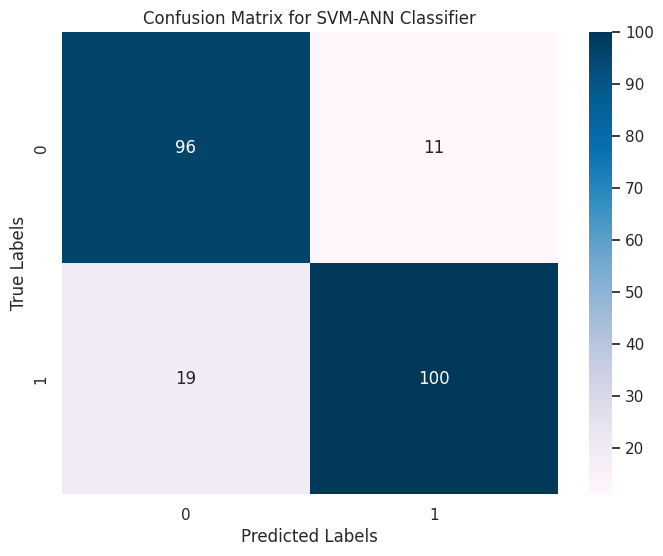

In [113]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=stacking_clf.classes_, yticklabels=stacking_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM-ANN Classifier')
plt.savefig('CM_SVM_ANN.jpg', dpi=500)
plt.show()


In [114]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
svmann_roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC Score: ", svmann_roc_auc)


ROC AUC Score:  0.8687661980680124


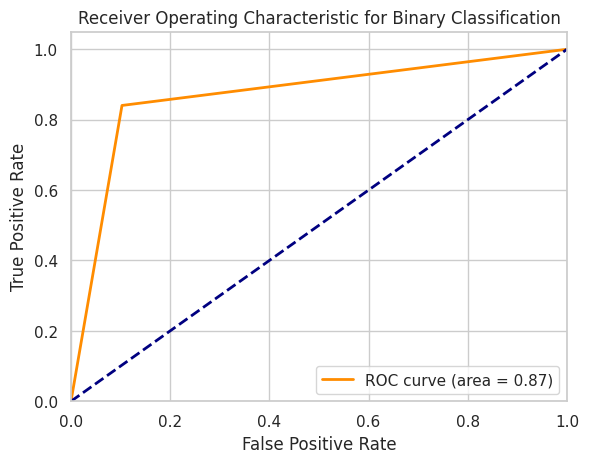

In [115]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_SVM_ANN.jpg', dpi=300)
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       107
           1       0.97      0.87      0.92       119

    accuracy                           0.92       226
   macro avg       0.92      0.92      0.92       226
weighted avg       0.92      0.92      0.92       226

Accuracy: 0.9159
Precision: 0.9192
Recall (Sensitivity): 0.9188
F1 Score: 0.9159


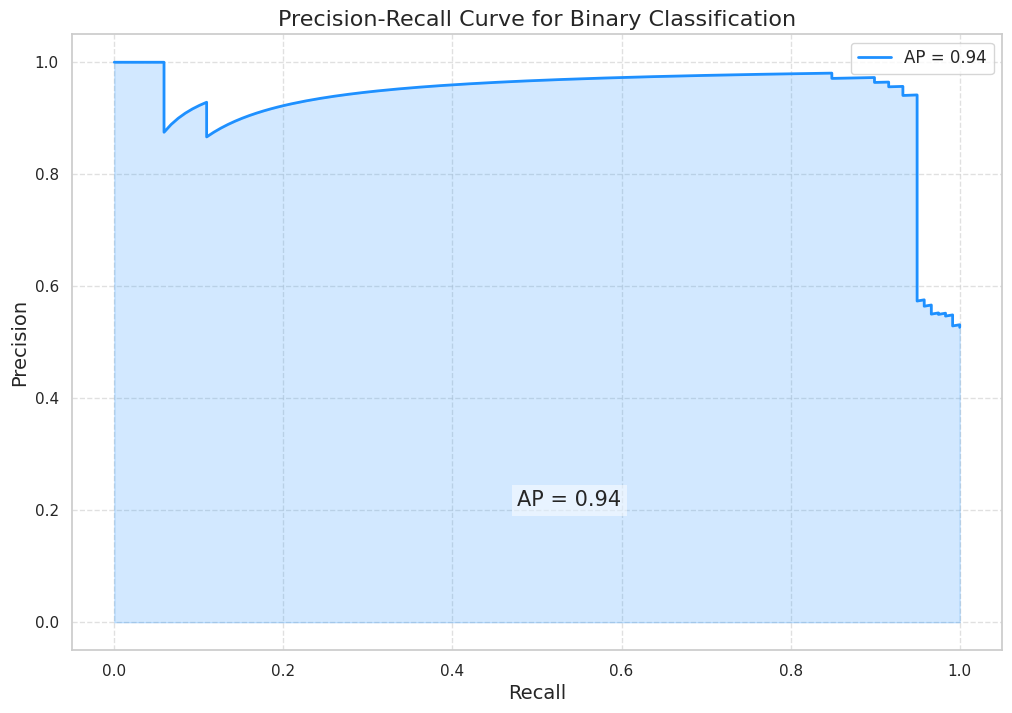

In [122]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SVM and ANN classifiers with probability enabled for SVC
svm_clf = SVC(kernel='linear', probability=True, random_state=42)  # Enable probability=True
ann_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # ANN classifier

# Initialize the stacking classifier with base estimators and an SVC meta-classifier with probability enabled
estimators = [('svm', svm_clf), ('ann', ann_clf)]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(probability=True, random_state=42)  # Enable probability=True for the meta-classifier
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Ensure the model outputs probability predictions for the Precision-Recall Curve
predictions_prob = stacking_clf.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision_vals, recall_vals, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Plotting the Precision-Recall Curve
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
plt.plot(recall_vals, precision_vals, color='dodgerblue', lw=2, linestyle='-', label=f'AP = {average_precision:.2f}')
plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='dodgerblue')

# Adding annotations
plt.text(0.6, 0.2, f'AP = {average_precision:.2f}', fontsize=15,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Customize labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Binary Classification', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('PR_RF_ANN2.jpg', dpi=500)
plt.show()


## LR-CB-ANN

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Base classifiers
logistic_classifier = LogisticRegression(max_iter=100, random_state=42)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Meta classifier
meta_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Stacking Classifier
stacking_classifier4 = StackingClassifier(
    estimators=[('logistic', logistic_classifier), ('catboost', catboost_classifier), ('ann', ann_classifier)],
    final_estimator=meta_classifier,
    cv=5
)

# Training the stacking classifier
stacking_classifier4.fit(X_train, y_train)

# Predictions
predictions4 = stacking_classifier4.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions4)

# Calculate precision
precision = precision_score(y_test, predictions4, average='macro')

# Calculate recall (sensitivity)
recall = recall_score(y_test, predictions4, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, predictions4, average='macro')

# Print classification report
print(classification_report(y_test, predictions4, zero_division=1))

# Print the calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.96      0.99      0.98       119

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226

Accuracy: 0.9735
Precision: 0.9748
Recall (Sensitivity): 0.9724
F1 Score: 0.9733


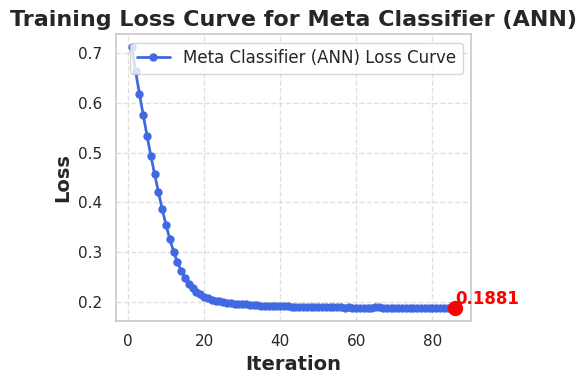

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the meta-classifier is an MLPClassifier and if it has a loss curve
if hasattr(stacking_classifier4.final_estimator_, 'loss_curve_'):
    # Extract the loss curve from the meta-classifier
    meta_loss_curve = stacking_classifier4.final_estimator_.loss_curve_

    # Enhanced plotting settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 4))

    # Plot the loss curve
    plt.plot(
        range(1, len(meta_loss_curve) + 1),  # Iterations
        meta_loss_curve,
        label='Meta Classifier (ANN) Loss Curve',
        color='royalblue',
        linestyle='-',
        marker='o',
        markersize=5,
        linewidth=2
    )

    # Highlight the final point on the curve
    plt.scatter(len(meta_loss_curve), meta_loss_curve[-1], color='red', s=100, zorder=5)

    # Annotating the final loss value
    plt.text(
        len(meta_loss_curve),
        meta_loss_curve[-1],
        f'{meta_loss_curve[-1]:.4f}',
        fontsize=12,
        ha='left',
        va='bottom',
        color='red',
        weight='bold'
    )

    # Customize plot
    plt.xlabel('Iteration', fontsize=14, weight='bold')
    plt.ylabel('Loss', fontsize=14, weight='bold')
    plt.title('Training Loss Curve for Meta Classifier (ANN)', fontsize=16, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12, loc='upper right')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig('Loss_Meta_ANN.jpg', dpi=500)
    plt.show()

else:
    print("The meta-classifier does not have a loss curve to display.")


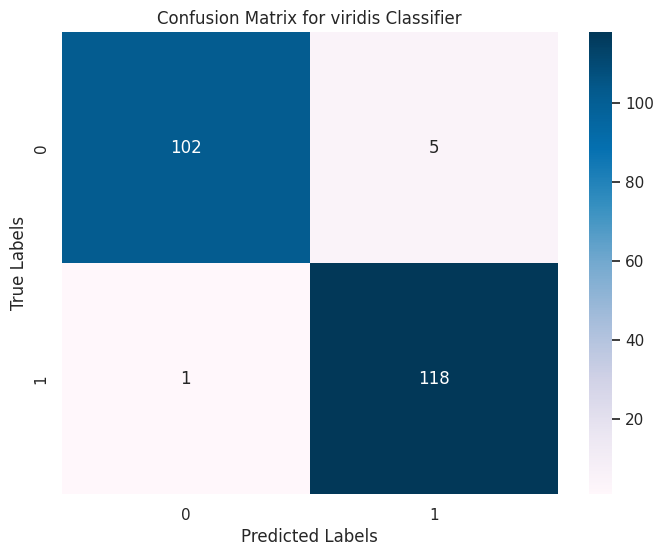

In [125]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions4)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", xticklabels=stacking_classifier4.classes_, yticklabels=stacking_classifier4.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for viridis Classifier')
plt.savefig('CM_LR_ANN_CB.jpg', dpi=300)
plt.show()


In [126]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for binary classification
lranncb_roc_auc = roc_auc_score(y_test, predictions4)

print("ROC AUC Score: ", lranncb_roc_auc)


ROC AUC Score:  0.9724338333464227


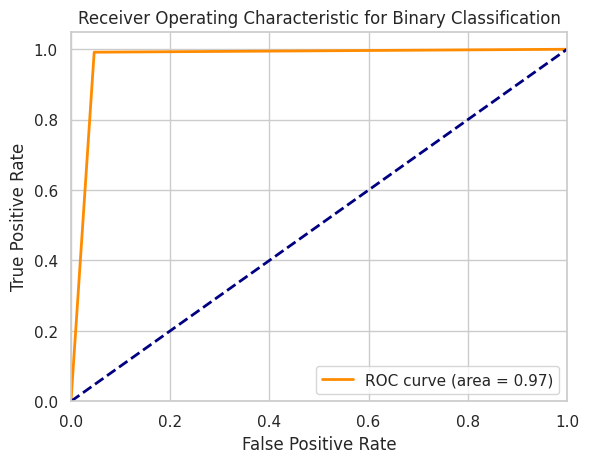

In [127]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, predictions4)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.savefig('AUC_LR_ANN_CB.jpg', dpi=300)
plt.show()


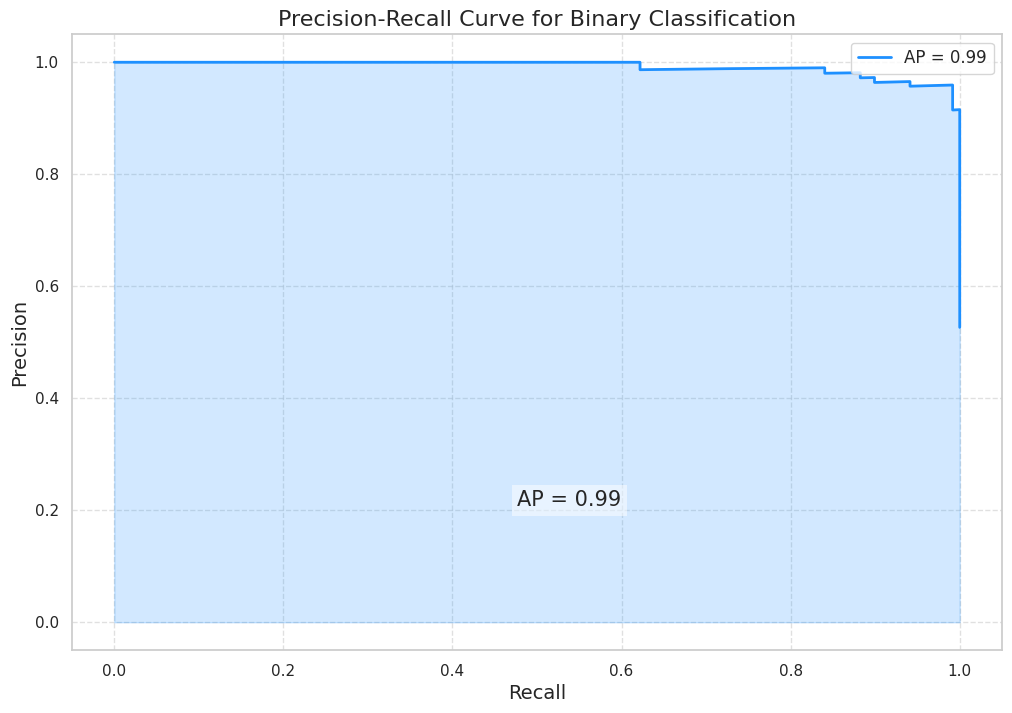

In [129]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model outputs probability predictions
# predictions_prob should contain probabilities for the positive class (disease)
predictions_prob = stacking_classifier4.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class

# Calculate precision and recall values for the positive class
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
average_precision = average_precision_score(y_test, predictions_prob)

# Set up the color palette
sns.set(style="whitegrid")

# Plotting the Precision-Recall Curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='dodgerblue', lw=2, linestyle='-', label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, precision, alpha=0.2, color='dodgerblue')

# Adding annotations
plt.text(0.6, 0.2, f'AP = {average_precision:.2f}', fontsize=15, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Customize labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Binary Classification', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('PR_CB_ANN_LR.jpg', dpi=500)
plt.show()


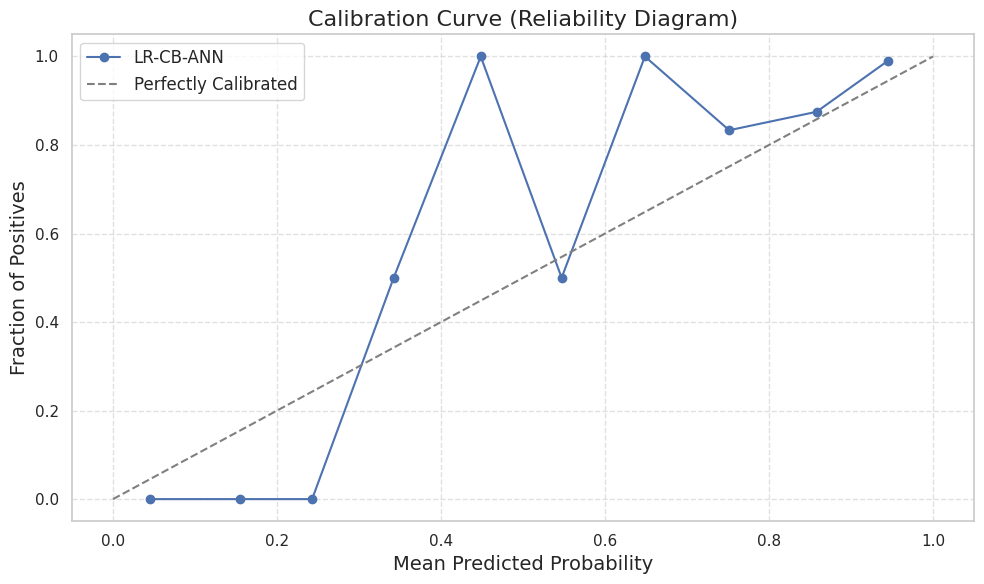

In [144]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

# Calibrate the stacking classifier using sigmoid calibration
calibrated_stacking_clf = CalibratedClassifierCV(stacking_classifier4, method='sigmoid', cv=5)
calibrated_stacking_clf.fit(X_train, y_train)

# Predict probabilities on the test set
prob_pos = calibrated_stacking_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve values
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='LR-CB-ANN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

# Customizing the plot
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('Calibration Curve (Reliability Diagram)', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and display the plot
plt.tight_layout()
plt.savefig('Calibration_Curve_LR-CB-ANN.jpg', dpi=300)
plt.show()


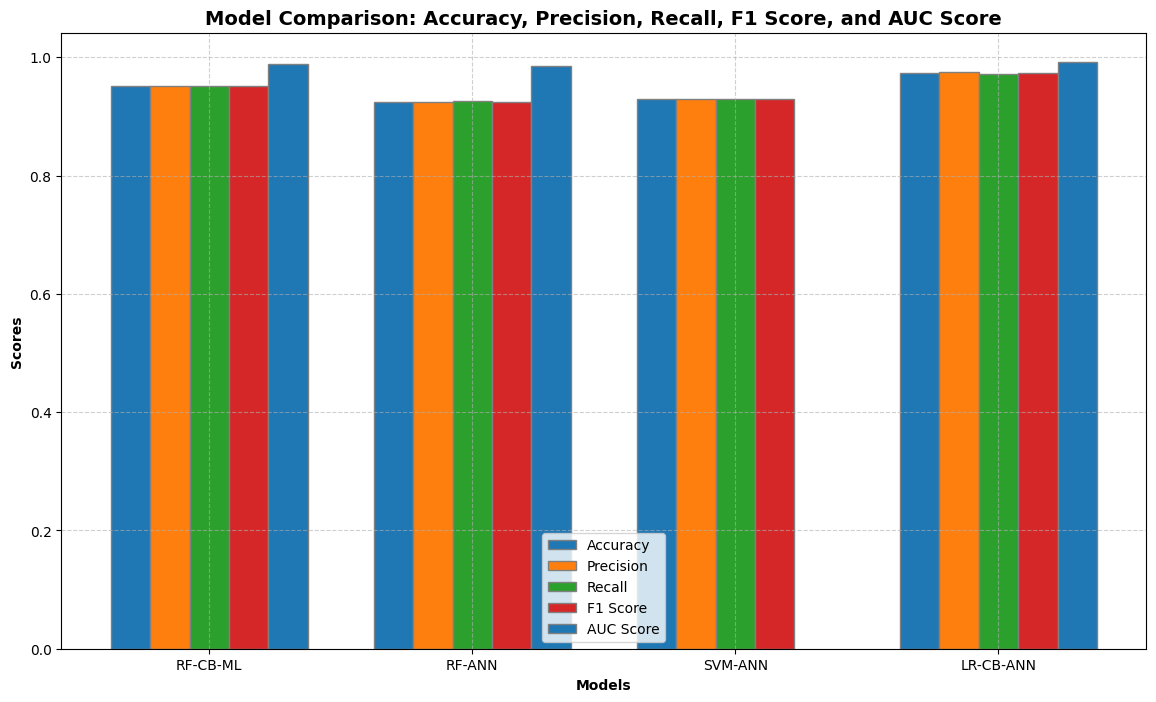

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Define and fit models
# RF-CB-ML
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)
meta_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)
stacking_classifier1 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('catboost', catboost_classifier), ('ann', ann_classifier)],
    final_estimator=meta_classifier,
    cv=5
)
stacking_classifier1.fit(X_train, y_train)
predictions1 = stacking_classifier1.predict(X_test)
proba1 = stacking_classifier1.predict_proba(X_test) if hasattr(stacking_classifier1, 'predict_proba') else None

# RF-ANN
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
stacking_classifier2 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('ann', ann_model)],
    final_estimator=meta_classifier,
    cv=5
)
stacking_classifier2.fit(X_train, y_train)
predictions2 = stacking_classifier2.predict(X_test)
proba2 = stacking_classifier2.predict_proba(X_test) if hasattr(stacking_classifier2, 'predict_proba') else None

# SVM-ANN
svm_clf = SVC(kernel='linear', probability=True)
ann_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
stacking_clf = StackingClassifier(estimators=[('svm', svm_clf), ('ann', ann_clf)], final_estimator=SVC())
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
proba_svm_ann = stacking_clf.predict_proba(X_test) if hasattr(stacking_clf, 'predict_proba') else None

# LR-CB-ANN
logistic_classifier = LogisticRegression(max_iter=100, random_state=42)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)
meta_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)
stacking_classifier4 = StackingClassifier(
    estimators=[('logistic', logistic_classifier), ('catboost', catboost_classifier), ('ann', ann_classifier)],
    final_estimator=meta_classifier,
    cv=5
)
stacking_classifier4.fit(X_train, y_train)
predictions4 = stacking_classifier4.predict(X_test)
proba4 = stacking_classifier4.predict_proba(X_test) if hasattr(stacking_classifier4, 'predict_proba') else None

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc = roc_auc_score(y_true, model_proba[:, 1]) if model_proba is not None else np.nan
    return accuracy, precision, recall, f1, auc

metrics1 = calculate_metrics(y_test, predictions1, proba1)
metrics2 = calculate_metrics(y_test, predictions2, proba2)
metrics_svm_ann = calculate_metrics(y_test, y_pred, proba_svm_ann)
metrics4 = calculate_metrics(y_test, predictions4, proba4)

# Metrics lists
models = ['RF-CB-ML', 'RF-ANN', 'SVM-ANN', 'LR-CB-ANN']
accuracy_scores = [metrics1[0], metrics2[0], metrics_svm_ann[0], metrics4[0]]
precision_scores = [metrics1[1], metrics2[1], metrics_svm_ann[1], metrics4[1]]
recall_scores = [metrics1[2], metrics2[2], metrics_svm_ann[2], metrics4[2]]
f1_scores = [metrics1[3], metrics2[3], metrics_svm_ann[3], metrics4[3]]
auc_scores = [metrics1[4], metrics2[4], metrics_svm_ann[4], metrics4[4]]

# Plotting
bar_width = 0.15
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(14, 8))
plt.bar(r1, accuracy_scores, color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color=colors[3], width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r5, auc_scores, color=colors[0], width=bar_width, edgecolor='grey', label='AUC Score')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(models))], models)
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, and AUC Score', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('model_comparison_plot.png', dpi=500, bbox_inches='tight')
plt.show()
